#1. How we do customer segmentation

**We can use K-means Clustering algorithm to categorized our customer into different group then we can observe and recommend the right product to each individual.**



# Import Library

In [ ]:
#data manipulation 
import pandas as pd
import numpy as np
import datetime

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.decomposition import PCA
from pylab import rcParams

#machine learning 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

%matplotlib inline
%config InlineBackend.figure_format='retina'

RANDOM_SEED = 42

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette("pastel"))
rcParams['figure.figsize'] = 12, 8

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [ ]:
data = pd.read_csv("Exercise1.csv")

### Data preview

In [ ]:
print(f'data dim: {data.shape}')
print('')
data.head()

data dim: (8068, 9)



,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [ ]:
#drop unuseable column
to_drop = ["ID"]
data.drop(to_drop, axis=1, inplace=True)

# Data Checking

### Check duplicate

In [ ]:
data.duplicated().sum()

1211

In [ ]:
data.drop_duplicates(inplace=True)
print(f'data dim: {data.shape}')

data dim: (6857, 8)


### Check data type

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6857 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6857 non-null   object 
 1   Ever_Married     6717 non-null   object 
 2   Age              6857 non-null   int64  
 3   Graduated        6780 non-null   object 
 4   Profession       6735 non-null   object 
 5   Work_Experience  6093 non-null   float64
 6   Spending_Score   6857 non-null   object 
 7   Family_Size      6531 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 482.1+ KB


### Check NaN

In [ ]:
data.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           77
Profession         122
Work_Experience    764
Spending_Score       0
Family_Size        326
dtype: int64

In [ ]:
data.isnull().sum(axis = 1).value_counts()

0    5583
1    1135
2     124
3      14
4       1
dtype: int64

### Null columns review

In [ ]:
data[data.isna().any(axis=1)].sample(20)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
4310,Male,No,31,Yes,Healthcare,0.0,Low,NaN
3718,Male,No,31,Yes,Healthcare,NaN,Low,3.0
766,Male,Yes,37,Yes,Entertainment,NaN,Low,NaN
5620,Female,NaN,19,No,Healthcare,8.0,Low,NaN
5868,Female,No,23,No,Healthcare,NaN,Low,2.0
7505,Female,No,42,Yes,Marketing,NaN,Low,3.0
7776,Female,Yes,37,No,Engineer,NaN,Average,9.0
3046,Female,Yes,59,No,Homemaker,NaN,High,2.0
1468,Female,Yes,58,Yes,Artist,NaN,Average,6.0
7541,Male,NaN,59,Yes,Entertainment,NaN,Average,4.0


In [ ]:
data[data.isna().sum(axis=1)==2].sample(20)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
6911,Male,Yes,59,Yes,Artist,NaN,Low,NaN
5516,Male,NaN,28,No,Entertainment,NaN,Low,2.0
3888,Male,Yes,84,No,Lawyer,NaN,Low,NaN
6253,Male,Yes,25,NaN,Artist,8.0,Low,NaN
652,Female,Yes,51,Yes,Artist,NaN,Low,NaN
5259,Male,Yes,37,NaN,NaN,2.0,High,5.0
5443,Male,Yes,42,No,NaN,8.0,Low,NaN
4945,Male,Yes,67,No,Lawyer,NaN,Low,NaN
2566,Female,NaN,25,Yes,Homemaker,NaN,Low,1.0
7043,Female,No,47,No,Engineer,NaN,Low,NaN


In [ ]:
data[data.isna().sum(axis=1)==3]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
801,Male,Yes,60,NaN,NaN,NaN,Average,4.0
850,Male,NaN,61,No,NaN,0.0,High,NaN
1334,Female,NaN,30,Yes,NaN,NaN,Average,4.0
2257,Female,No,36,No,NaN,NaN,Low,NaN
2833,Male,NaN,72,NaN,Lawyer,0.0,High,NaN
3120,Male,Yes,63,NaN,NaN,NaN,Average,2.0
4014,Female,Yes,70,NaN,Lawyer,NaN,High,NaN
4137,Female,No,43,No,NaN,NaN,Low,NaN
4782,Male,Yes,78,NaN,Lawyer,NaN,Low,NaN
5746,Female,Yes,42,No,NaN,NaN,Average,NaN


In [ ]:
data[data.isna().sum(axis=1)==4]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
3728,Female,NaN,20,No,NaN,NaN,High,NaN


### Categorical column preview

In [ ]:
for i in data.columns:
  if data[i].dtypes == 'object':
    print(i)
    print(data[i].unique())
    print('-'*30)

Gender
['Male' 'Female']
------------------------------
Ever_Married
['No' 'Yes' nan]
------------------------------
Graduated
['No' 'Yes' nan]
------------------------------
Profession
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
------------------------------
Spending_Score
['Low' 'Average' 'High']
------------------------------


### Numerical column preview

In [ ]:
for i in data.columns:
  if data[i].dtypes in ['int64','float64']:
    print(f'{i} min and max: {data[i].min()} , {data[i].max()}')
    print('-'*30)

Age min and max: 18 , 89
------------------------------
Work_Experience min and max: 0.0 , 14.0
------------------------------
Family_Size min and max: 1.0 , 9.0
------------------------------


In [ ]:
data.describe()

,Age,Work_Experience,Family_Size
count,6857.000000,6093.000000,6531.000000
mean,43.753391,2.899557,2.874139
std,16.374625,3.526574,1.577335
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,41.000000,1.000000,3.000000
75%,53.000000,5.000000,4.000000
max,89.000000,14.000000,9.000000


# EDA

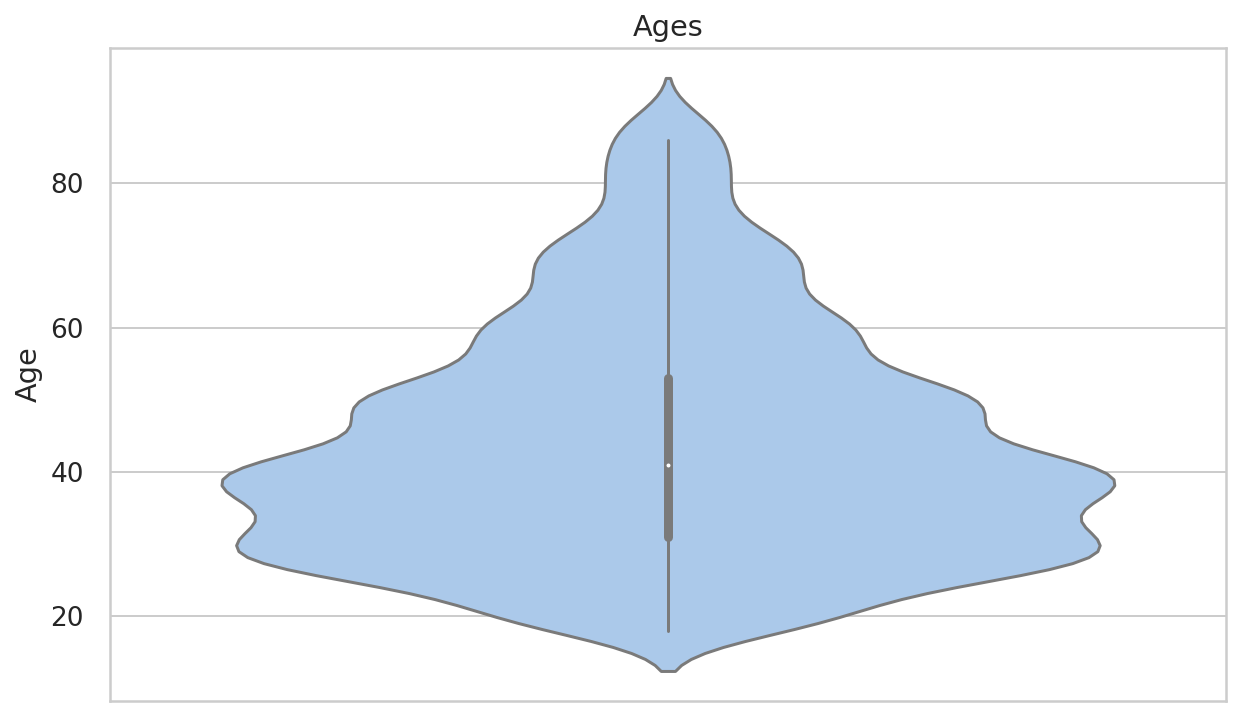

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Ages")
sns.axes_style("dark")
sns.violinplot(y=data["Age"])
plt.show()

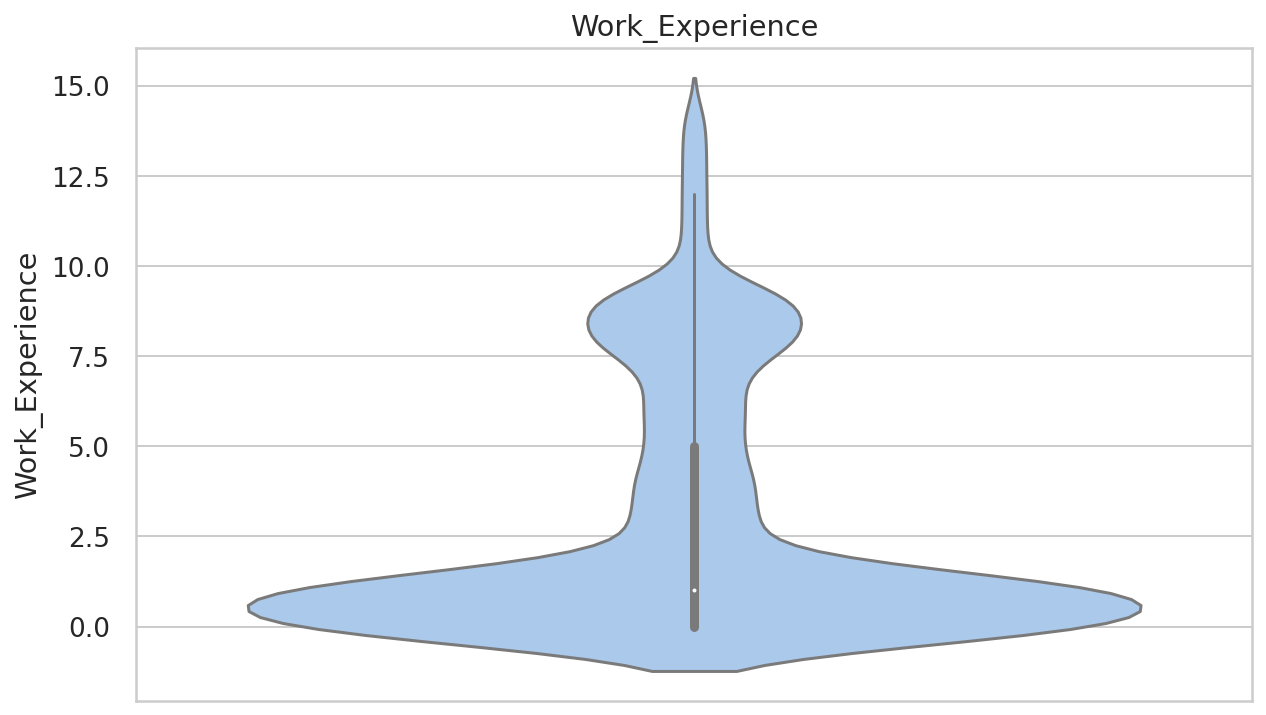

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Work_Experience")
sns.axes_style("dark")
sns.violinplot(y=data["Work_Experience"])
plt.show()

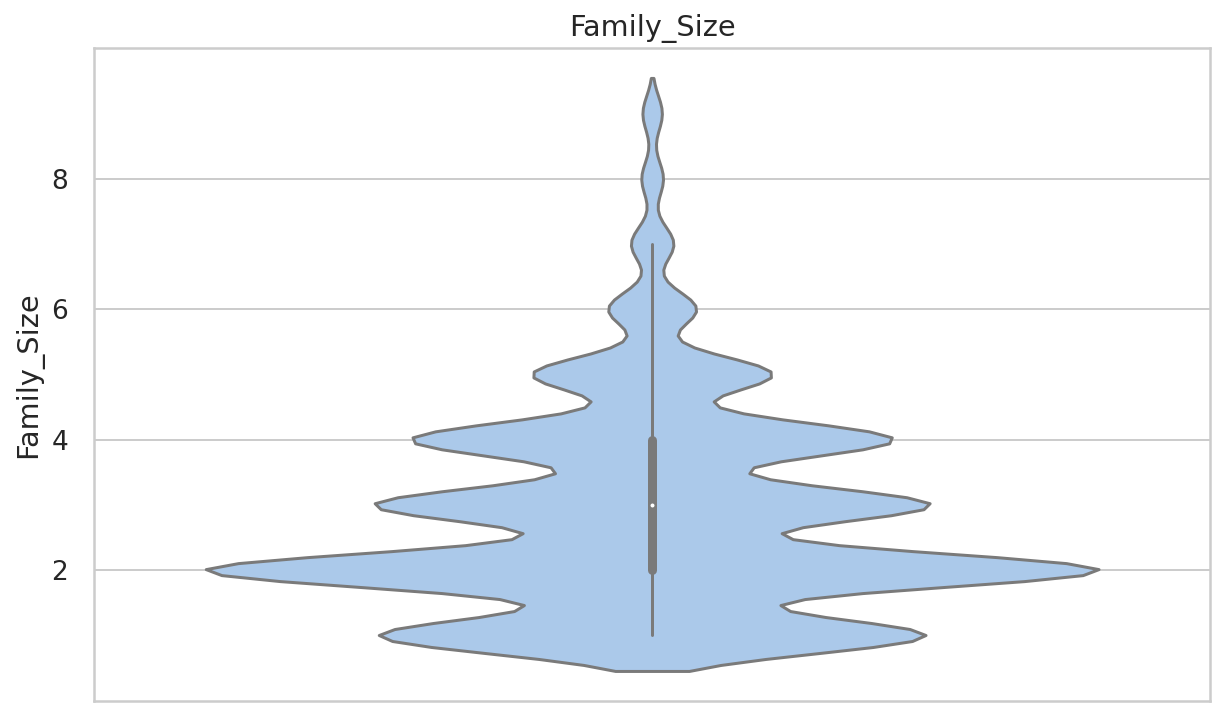

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Family_Size")
sns.axes_style("dark")
sns.violinplot(y=data["Family_Size"])
plt.show()

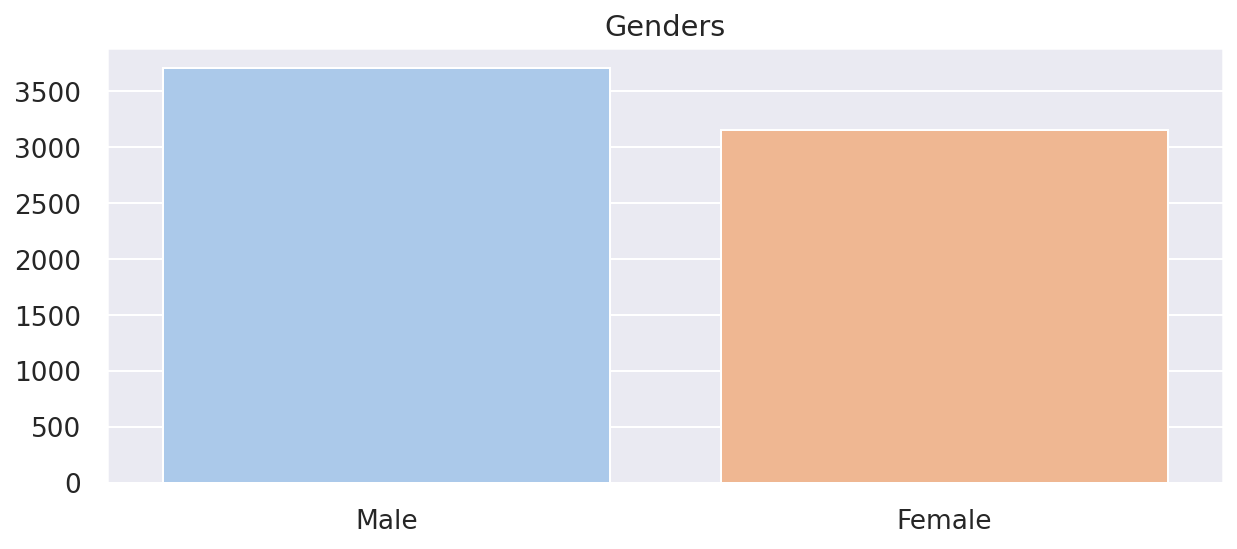

In [ ]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
plt.title("Genders")
sns.barplot(x=genders.index, y=genders.values)
plt.show()

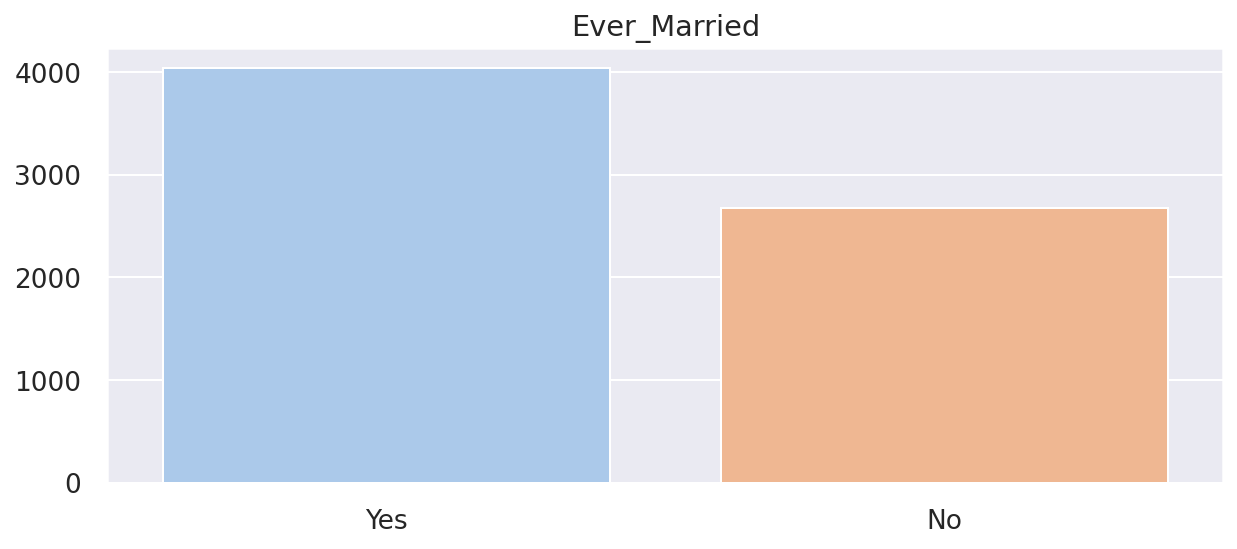

In [ ]:
married = data.Ever_Married.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
plt.title("Ever_Married")
sns.barplot(x=married.index, y=married.values)
plt.show()

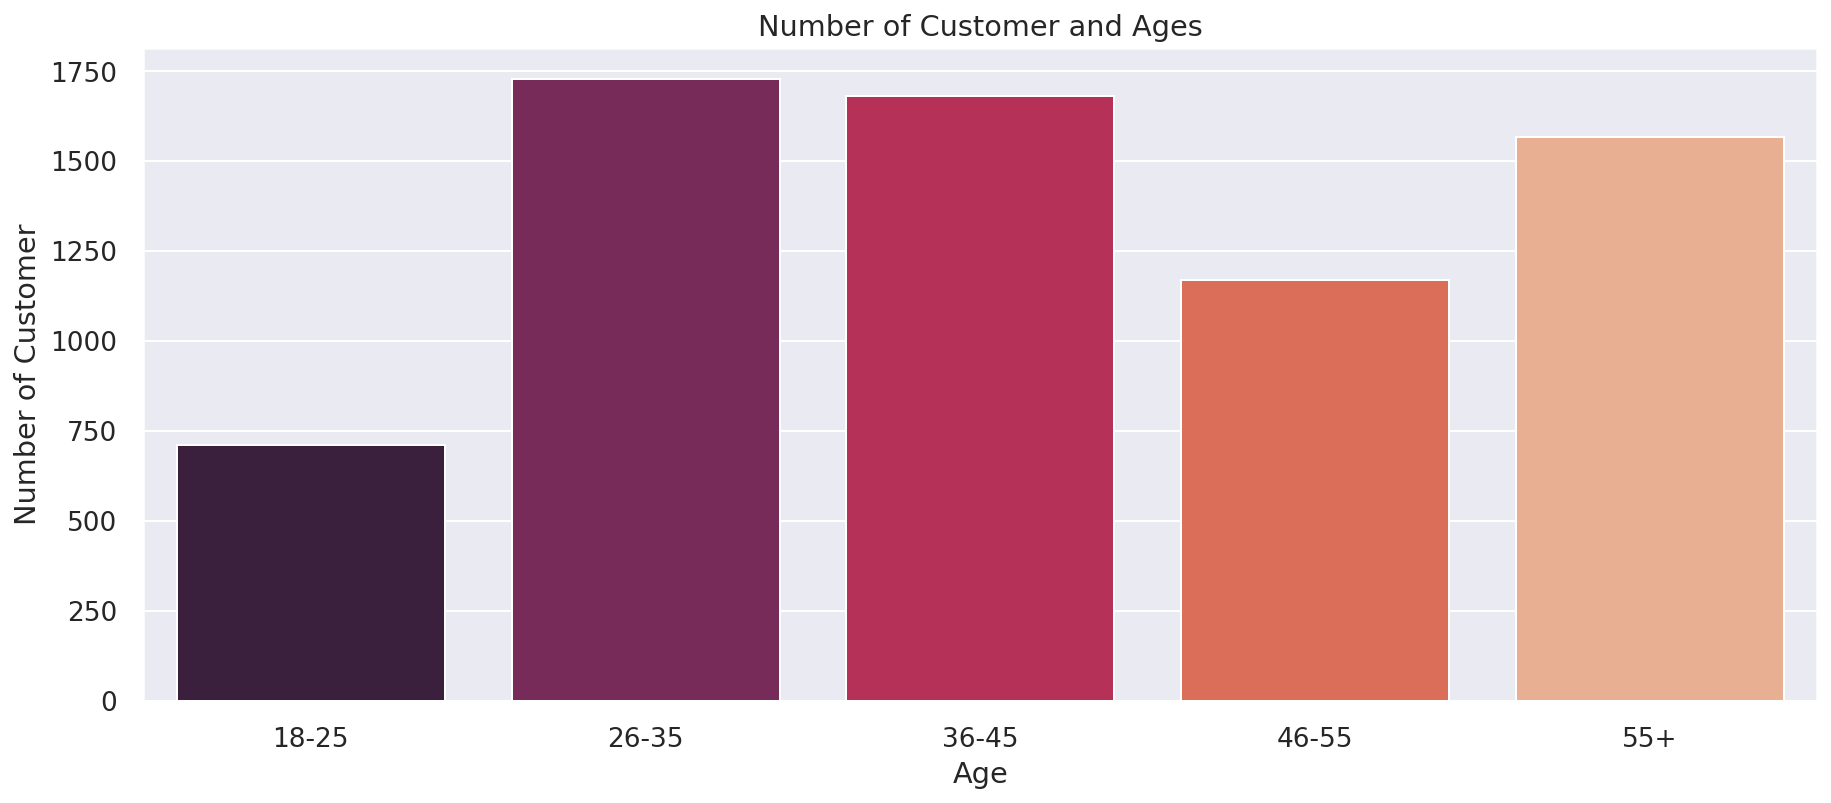

In [ ]:
age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55above = data.Age[data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

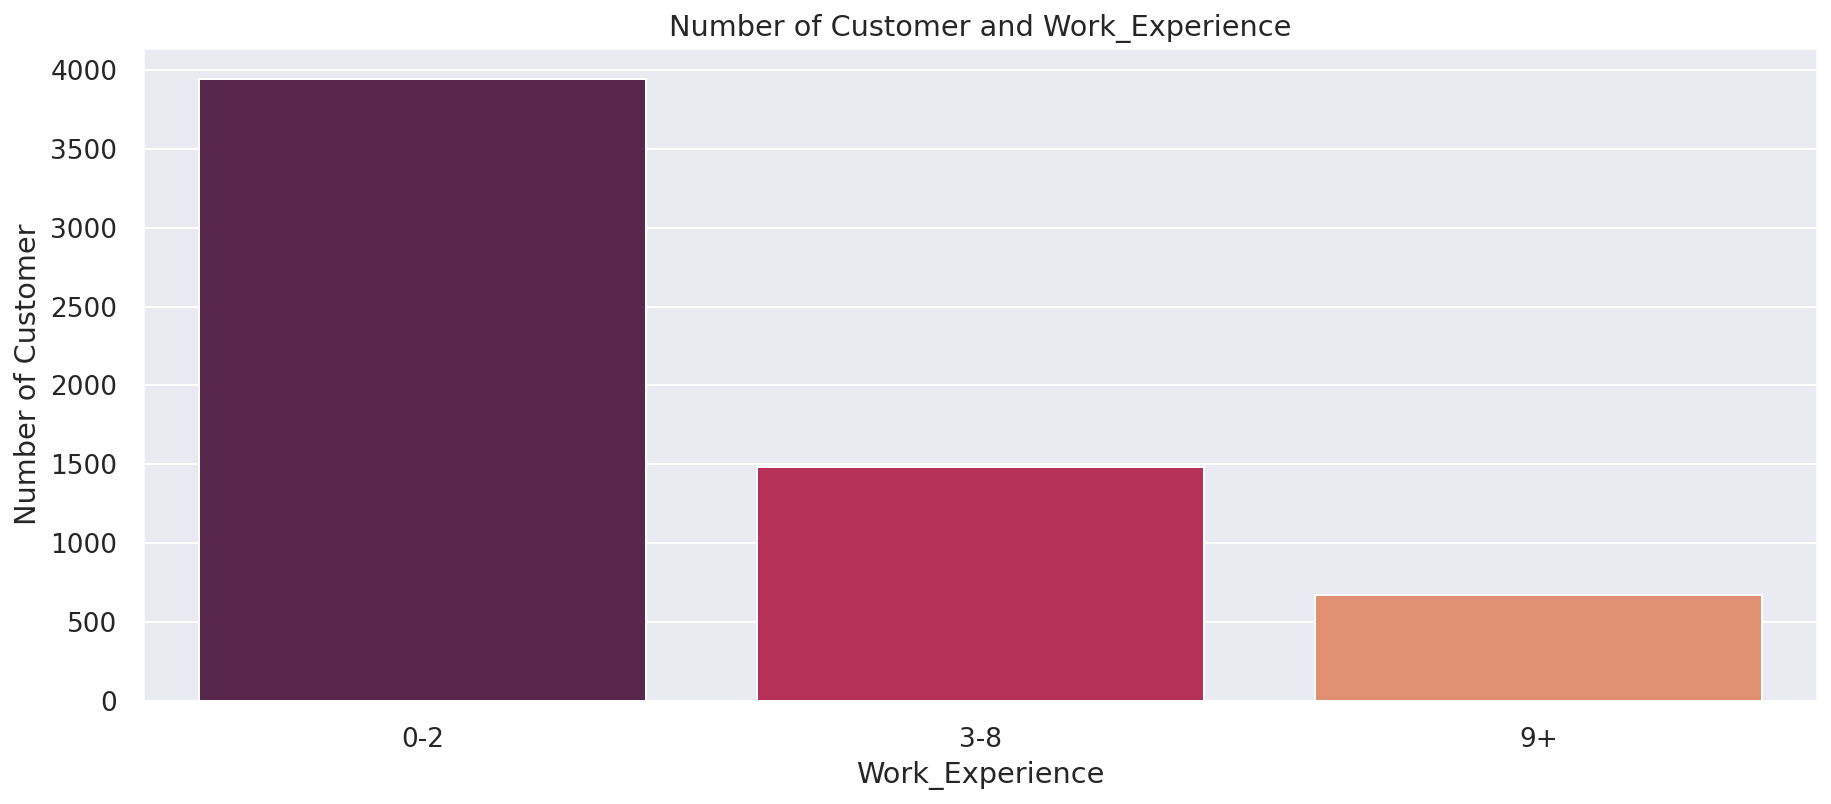

In [ ]:
work_age0_2 = data.Work_Experience[(data.Work_Experience <= 2)]
work_age3_8 = data.Work_Experience[(data.Work_Experience <= 8) & (data.Work_Experience >= 3)]
work_age9above = data.Work_Experience[data.Work_Experience >= 9]

x = ["0-2","3-8","9+"]
y = [len(work_age0_2.values),len(work_age3_8.values),len(work_age9above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Work_Experience")
plt.xlabel("Work_Experience")
plt.ylabel("Number of Customer")
plt.show()

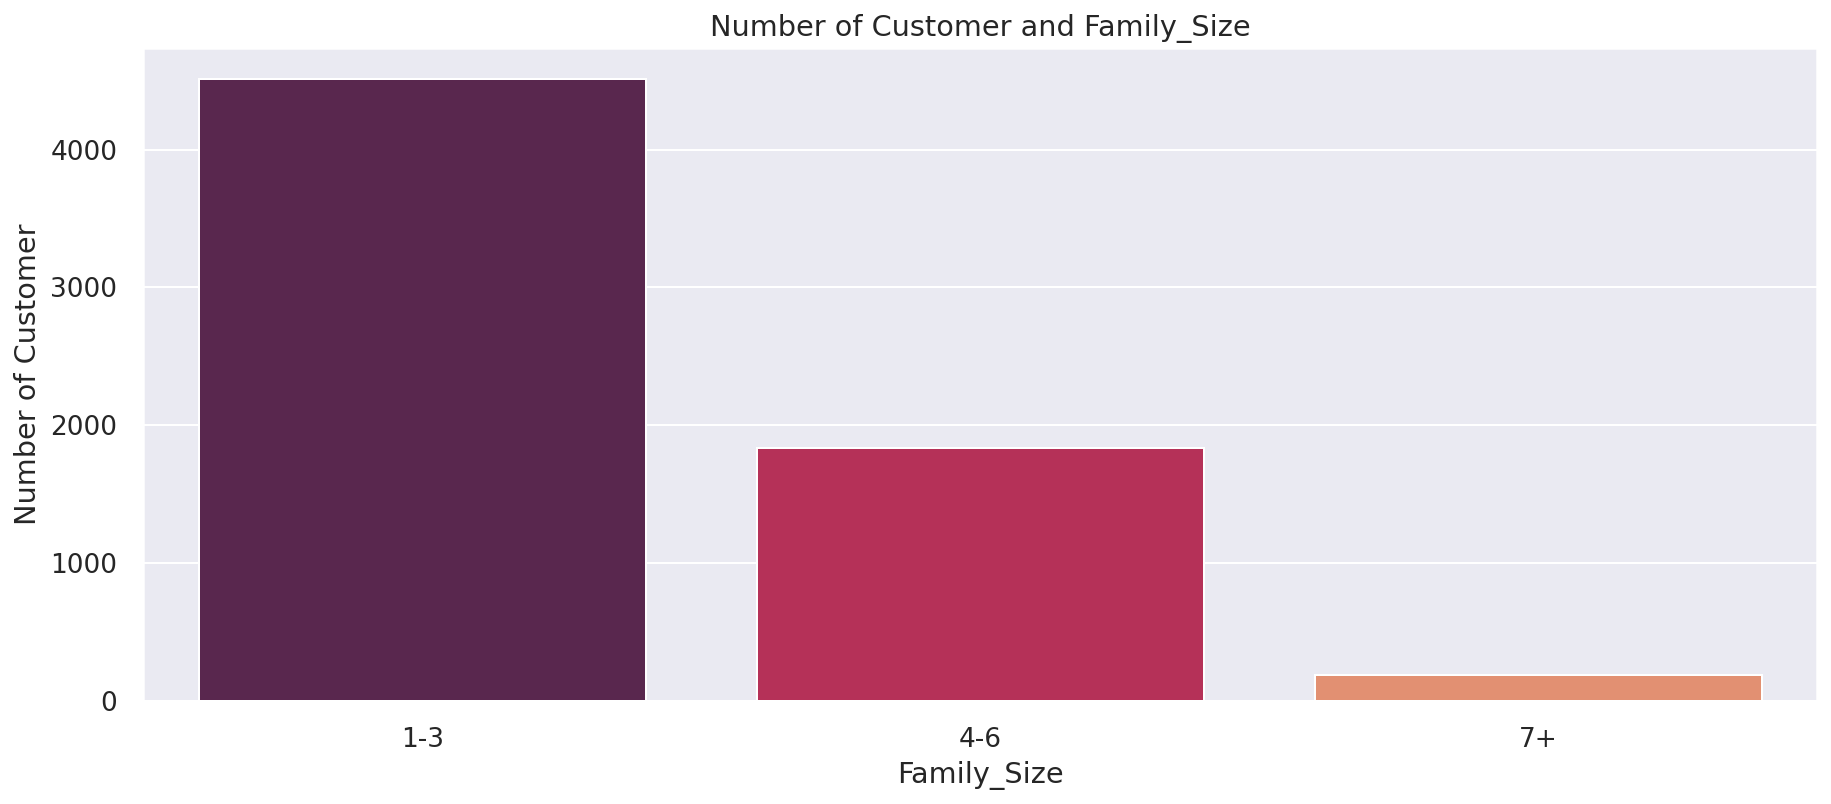

In [ ]:
family1_3 = data.Family_Size[(data.Family_Size <= 3)]
family4_6 = data.Family_Size[(data.Family_Size >= 4) & (data.Family_Size <= 6)]
family7above = data.Family_Size[(data.Family_Size >= 7)]

x = ["1-3","4-6","7+"]
y = [len(family1_3.values),len(family4_6.values),len(family7above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Family_Size")
plt.xlabel("Family_Size")
plt.ylabel("Number of Customer")
plt.show()

### Observation
- There are missing values in every column except ID, Gender, Age, Spending_Score
- Missing values mostly occur in Work_Experience and Family_Size
- We should drop rows with more than one missing value to keep a good data quality
- We can fill null values in Profession as "Undefined"
- There are categorical columns that need to be ordinal encode (Spending_Score)
- Numerical columns can be group and make our result on customer segmentation easy to explain
- No outlier was found


## Deal with missing value

In [ ]:
dropped_morethanone = data.drop(data[data.isna().sum(axis=1)>1].index)

In [ ]:
print('data after drop rows with more than one missing value')
print('-'*10)
print(f'data dim: {dropped_morethanone.shape}')
dropped_morethanone.isna().sum()

data after drop rows with more than one missing value
----------
data dim: (6718, 8)


Gender               0
Ever_Married       103
Age                  0
Graduated           52
Profession          85
Work_Experience    652
Spending_Score       0
Family_Size        243
dtype: int64

In [ ]:
dropped_work = dropped_morethanone.drop(dropped_morethanone[dropped_morethanone['Work_Experience'].isna()].index)
dropped_family = dropped_work.drop(dropped_work[data['Family_Size'].isna()].index)

In [ ]:
print('data after drop rows with null in Work_Experience and Family_Size')
print('-'*10)
print(f'data dim: {dropped_family.shape}')
dropped_family.isna().sum()

data after drop rows with null in Work_Experience and Family_Size
----------
data dim: (5823, 8)


Gender               0
Ever_Married       103
Age                  0
Graduated           52
Profession          85
Work_Experience      0
Spending_Score       0
Family_Size          0
dtype: int64

In [ ]:
dropped_final = dropped_family.dropna(subset=['Ever_Married','Graduated'])

In [ ]:
print('data after drop all null values except Profession')
print('-'*10)
print(f'data dim: {dropped_final.shape}')
dropped_final.isna().sum()

data after drop all null values except Profession
----------
data dim: (5668, 8)


Gender              0
Ever_Married        0
Age                 0
Graduated           0
Profession         85
Work_Experience     0
Spending_Score      0
Family_Size         0
dtype: int64

# Preprocessing
- Fill Profession column as "Undefined"
- One-hot Encode: Gender, Ever_Married, Graduated, Profession
- Ordinal Encode: Spending_Score
- Normalize numerical columns

### Fill Profession column as "Undefined"

In [ ]:
no_null_data = dropped_final.fillna('Undefined')

In [ ]:
print('data after fill Profession with "Undefined"')
print('-'*10)
print(f'data dim: {no_null_data.shape}')
no_null_data.isna().sum()

data after fill Profession with "Undefined"
----------
data dim: (5668, 8)


Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

### Ordinal Encode: Spending_Score

In [ ]:
ordinal_encoded_data = no_null_data.copy()

In [ ]:
#ordinal encoder on Spending_Score
spending_score_label = {"Low": 0, "Average": 0.5, "High": 1}
ordinal_encoded_data.Spending_Score = ordinal_encoded_data.Spending_Score.replace(spending_score_label) 

In [ ]:
ordinal_encoded_data.Spending_Score.unique()

array([0. , 1. , 0.5])

### One-hot Encode: Gender, Ever_Married, Graduated, Profession


In [ ]:
gender_label = {"Female": 0, "Male": 1}
ordinal_encoded_data.Gender = ordinal_encoded_data.Gender.replace(gender_label) 

In [ ]:
married_label = {"No": 0, "Yes": 1}
ordinal_encoded_data.Ever_Married = ordinal_encoded_data.Ever_Married.replace(married_label) 

In [ ]:
graduated_label = {"No": 0, "Yes": 1}
ordinal_encoded_data.Graduated = ordinal_encoded_data.Graduated.replace(graduated_label) 

In [ ]:
#one-hot encoder on categorical columns
one_hot_encoded_data = pd.get_dummies(ordinal_encoded_data, columns = ['Profession'])
one_hot_encoded_data.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Undefined
0,1,0,22,0,1.0,0.0,4.0,0,0,0,0,0,1,0,0,0,0
2,0,1,67,1,1.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0
3,1,1,67,1,0.0,1.0,2.0,0,0,0,0,0,0,0,1,0,0
5,1,1,56,0,0.0,0.5,2.0,1,0,0,0,0,0,0,0,0,0
6,1,0,32,1,1.0,0.0,3.0,0,0,0,0,0,1,0,0,0,0


### Normalize numerical columns: 'Age','Work_Experience','Family_Size'

In [ ]:
mms = MinMaxScaler()
one_hot_encoded_data[['Age','Work_Experience','Family_Size']] = mms.fit_transform(one_hot_encoded_data[['Age','Work_Experience','Family_Size']])

### Final preview

In [ ]:
preprocessed_data = one_hot_encoded_data.copy()
preprocessed_data.sample(10)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Undefined
2663,0,1,0.197183,1,0.285714,1.0,0.125,0,0,0,0,0,0,1,0,0,0
4048,1,1,0.492958,1,0.000000,1.0,0.375,0,0,0,0,0,1,0,0,0,0
5165,1,1,0.281690,1,0.428571,0.0,0.000,1,0,0,0,0,0,0,0,0,0
4505,0,1,0.380282,1,0.571429,0.5,0.125,1,0,0,0,0,0,0,0,0,0
2542,1,1,0.352113,0,0.428571,1.0,0.125,0,0,0,0,0,1,0,0,0,0
439,1,1,0.338028,1,0.000000,0.0,0.250,1,0,0,0,0,0,0,0,0,0
1768,1,1,0.577465,1,0.071429,0.5,0.250,1,0,0,0,0,0,0,0,0,0
4142,1,0,0.112676,1,0.500000,0.0,0.500,0,0,0,1,0,0,0,0,0,0
6177,0,1,0.676056,0,0.428571,0.5,0.375,0,0,1,0,0,0,0,0,0,0
179,0,0,0.183099,1,0.571429,0.0,0.000,0,0,1,0,0,0,0,0,0,0


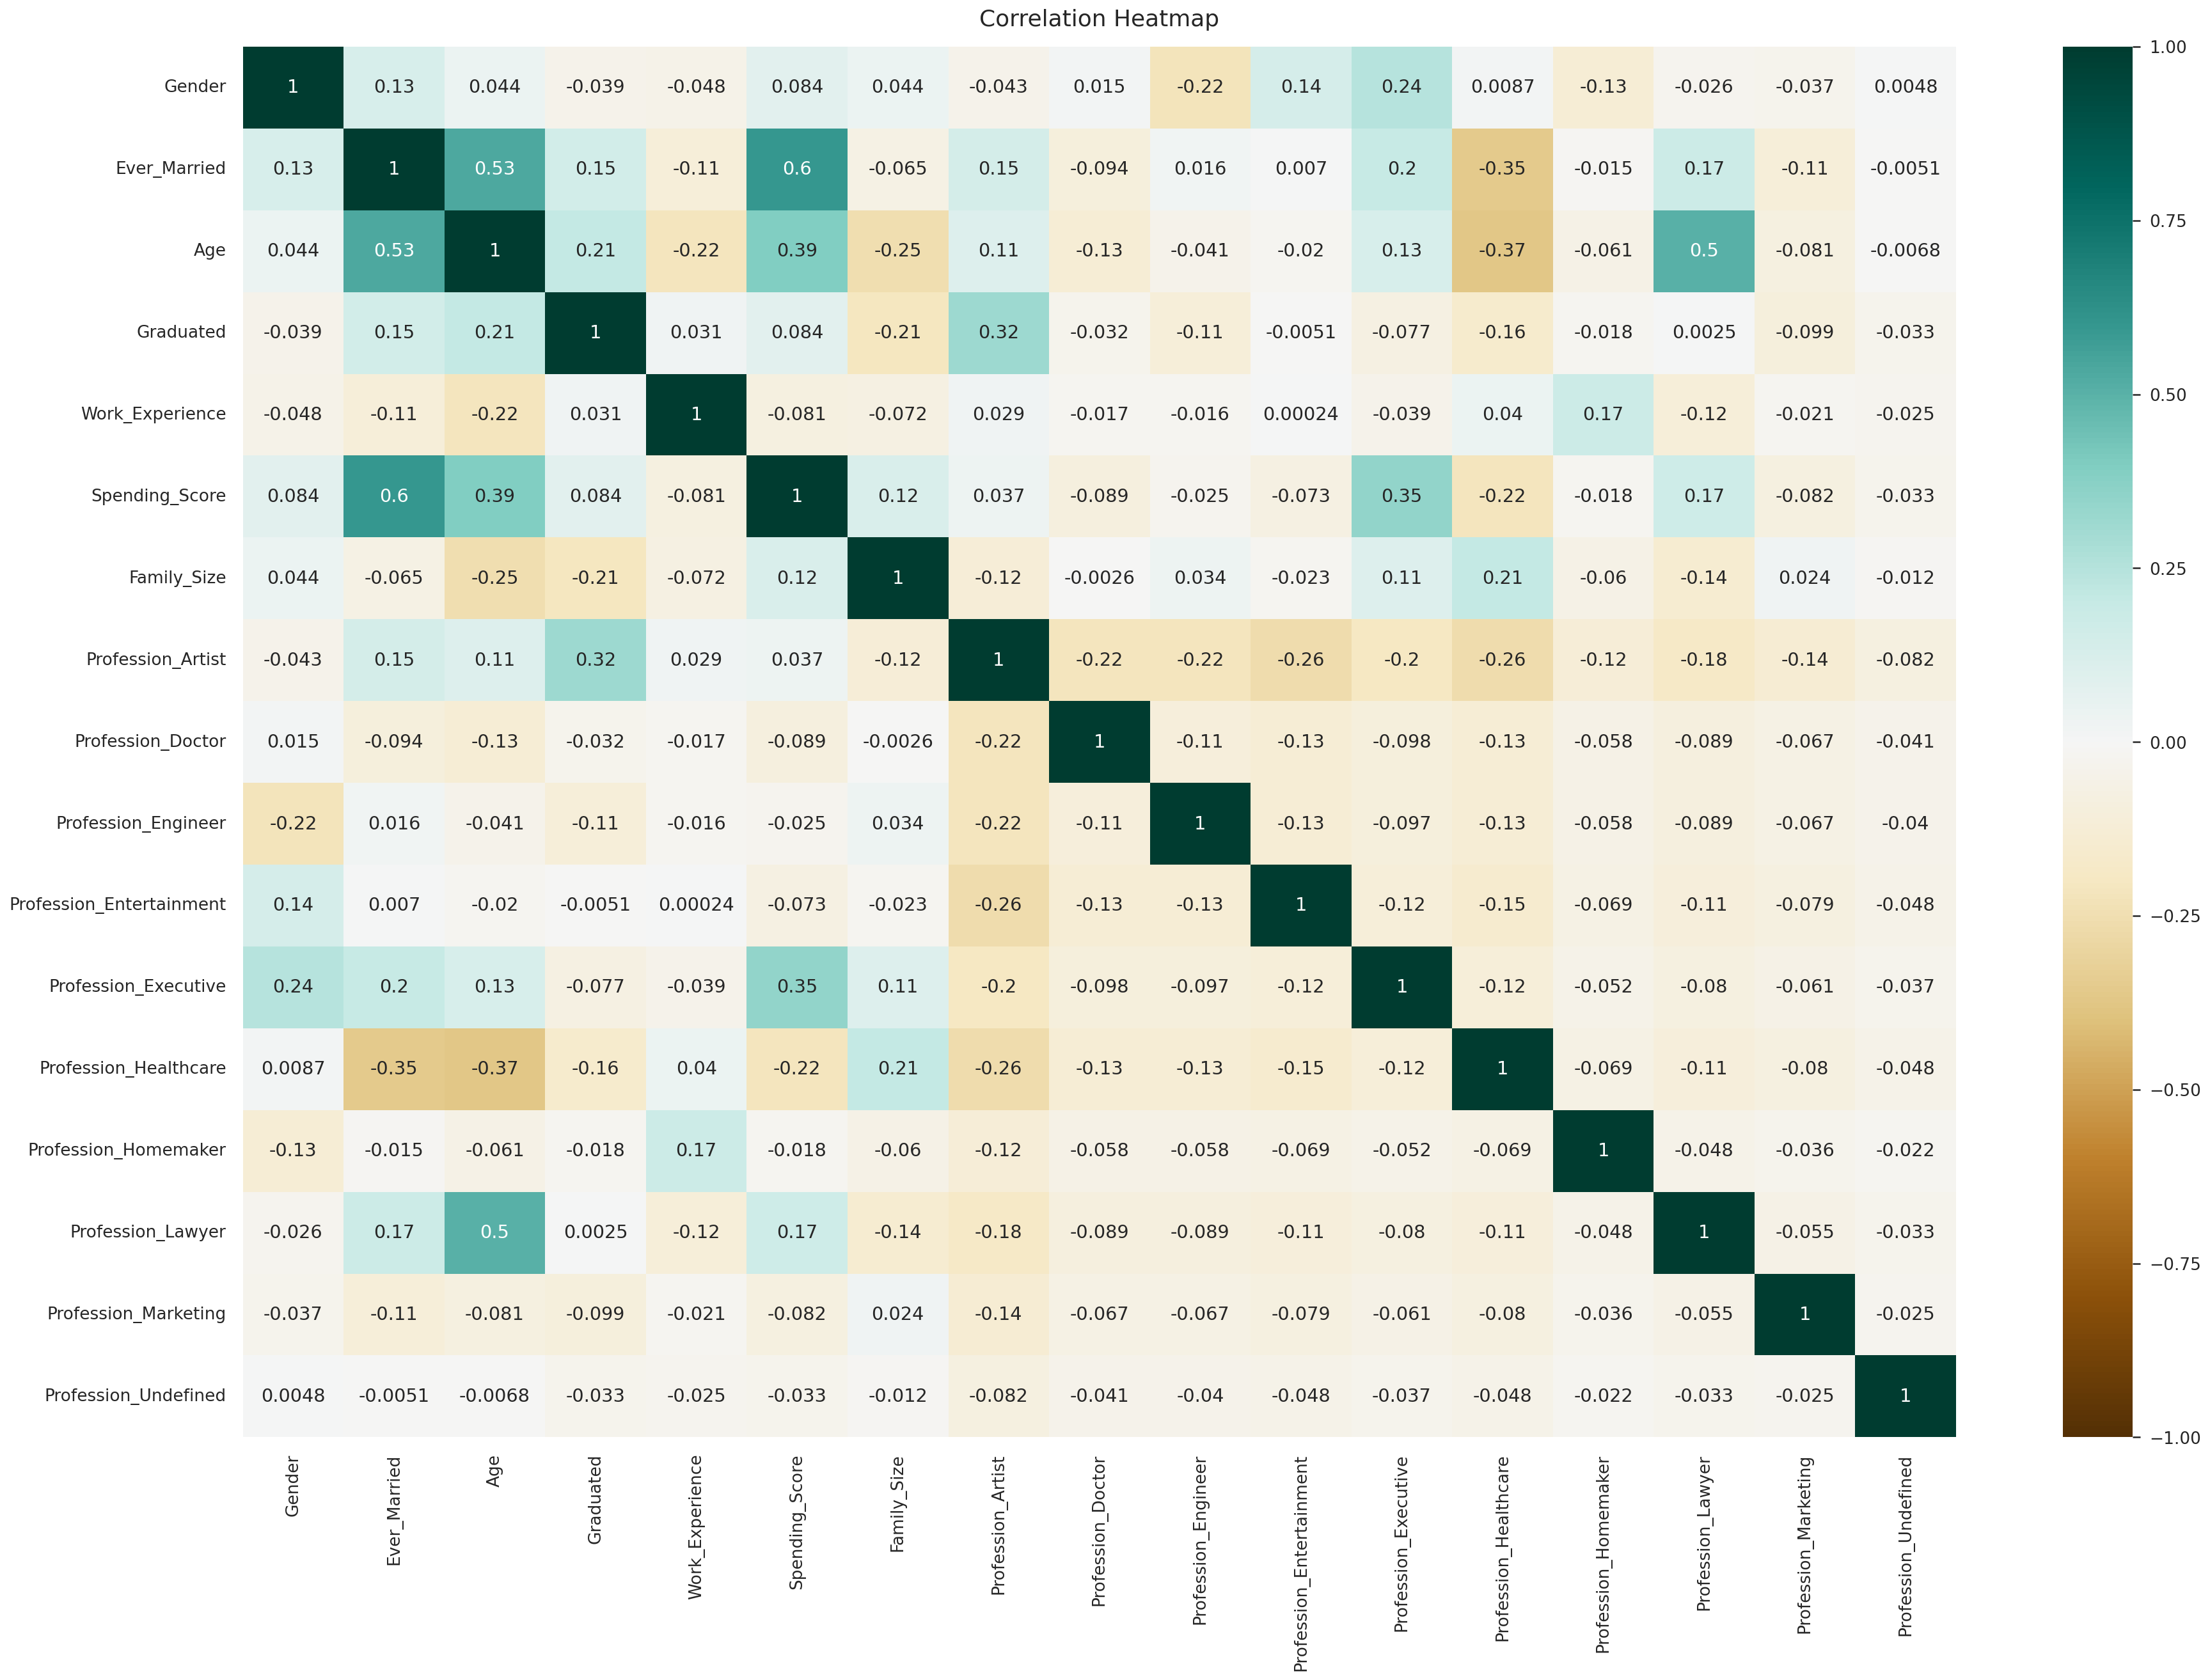

In [ ]:
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(preprocessed_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# K-means Clustering

### PCA preview

In [ ]:
pca = PCA(n_components=3)
pca.fit(preprocessed_data)
PCA_df = pd.DataFrame(pca.transform(preprocessed_data), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,5668.0,6.393380e-17,0.634448,-1.170429,-0.510832,-0.077134,0.550057,1.284097
col2,5668.0,-2.225147e-17,0.549978,-1.164218,-0.435471,-0.060824,0.458556,1.190164
col3,5668.0,-1.880406e-17,0.485215,-0.985525,-0.388149,-0.000235,0.319521,1.298864


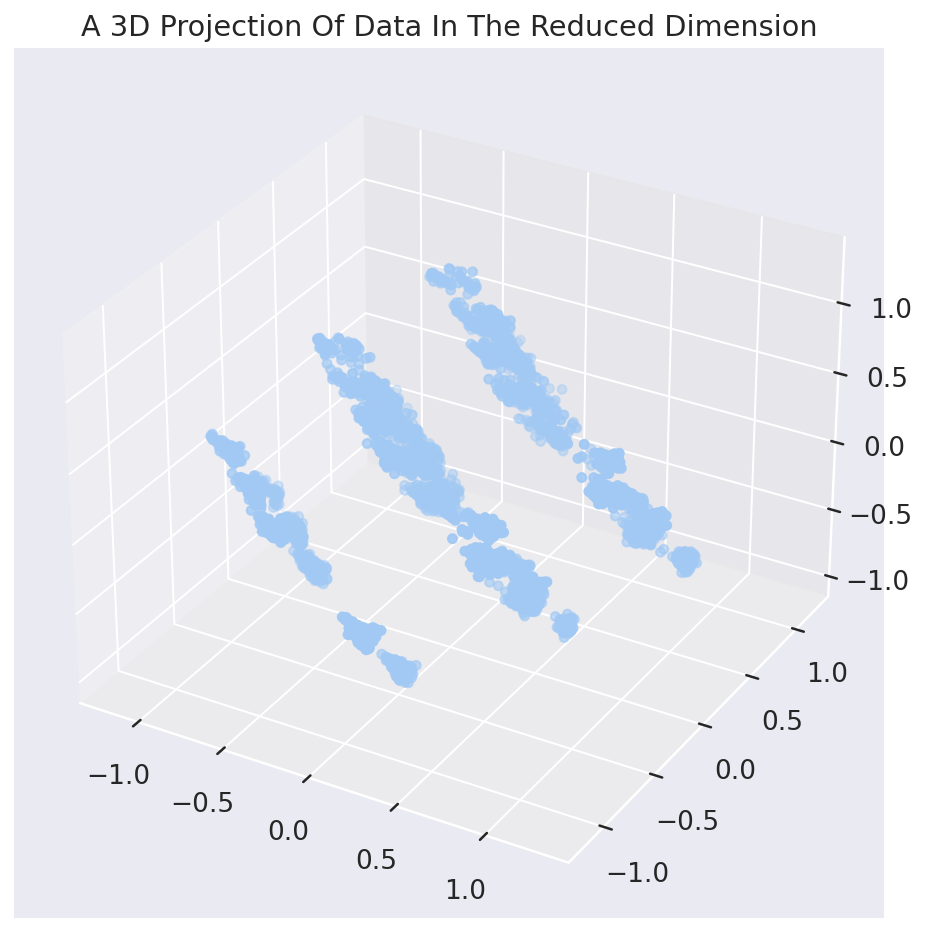

In [ ]:
x = PCA_df["col1"]
y = PCA_df["col2"]
z = PCA_df["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### Elbow Method

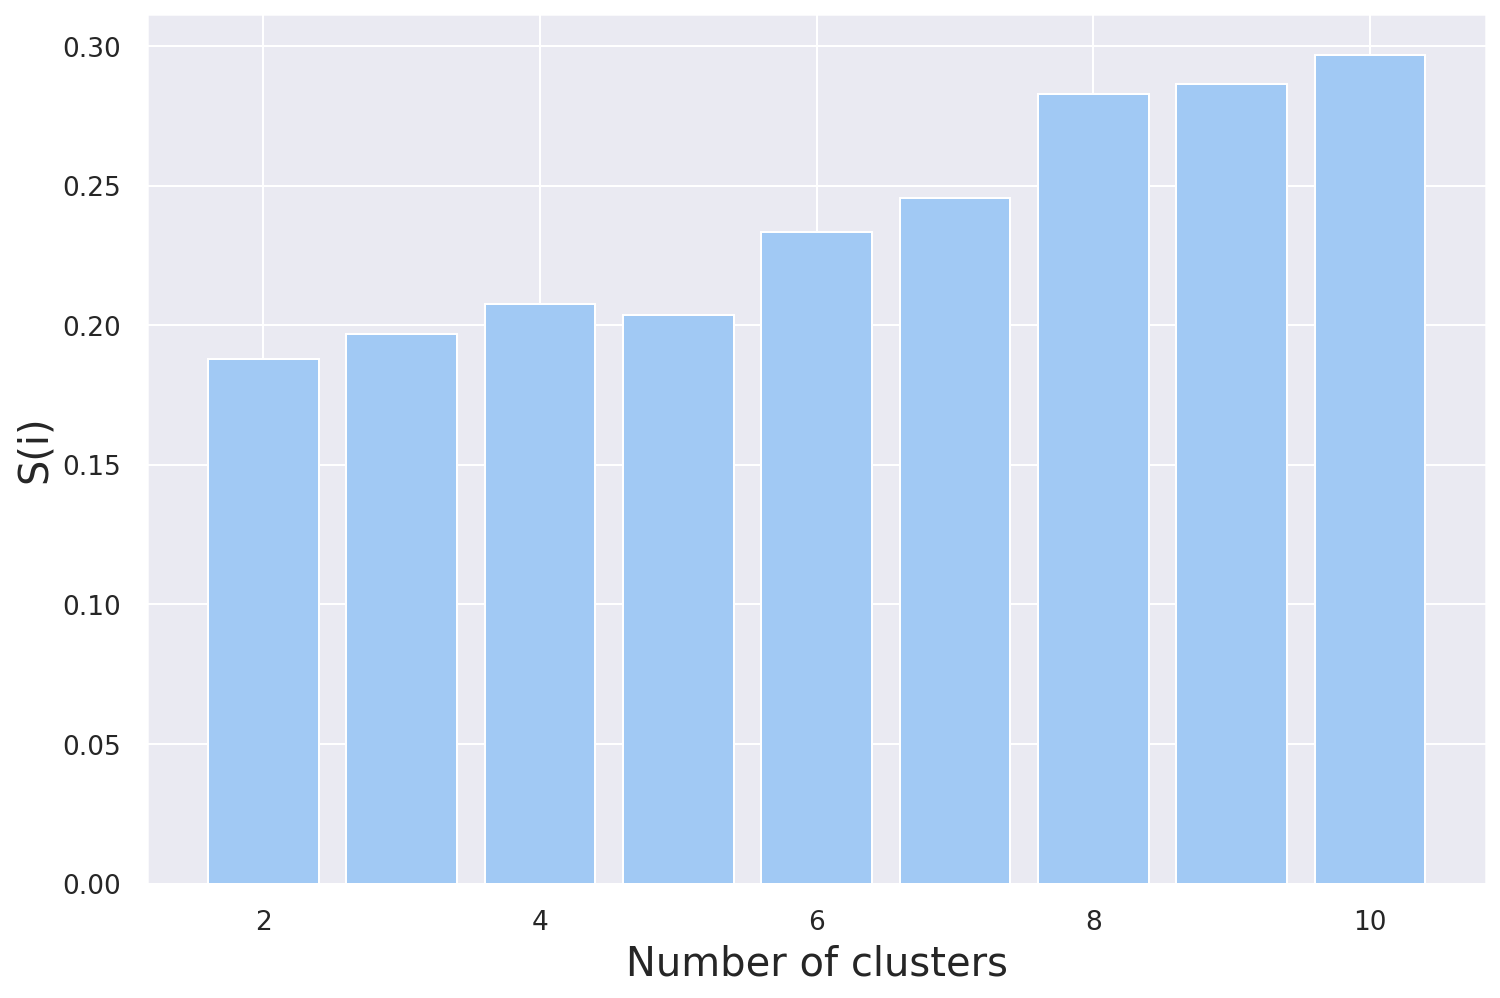

In [ ]:
silhouette_scores = []
for x in range(2,11):
    model = KMeans(n_clusters = x, random_state=RANDOM_SEED)
    model.fit(preprocessed_data)
    silhouette_scores.append(silhouette_score(preprocessed_data, model.labels_))

plt.bar(range(2,11), silhouette_scores)    
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

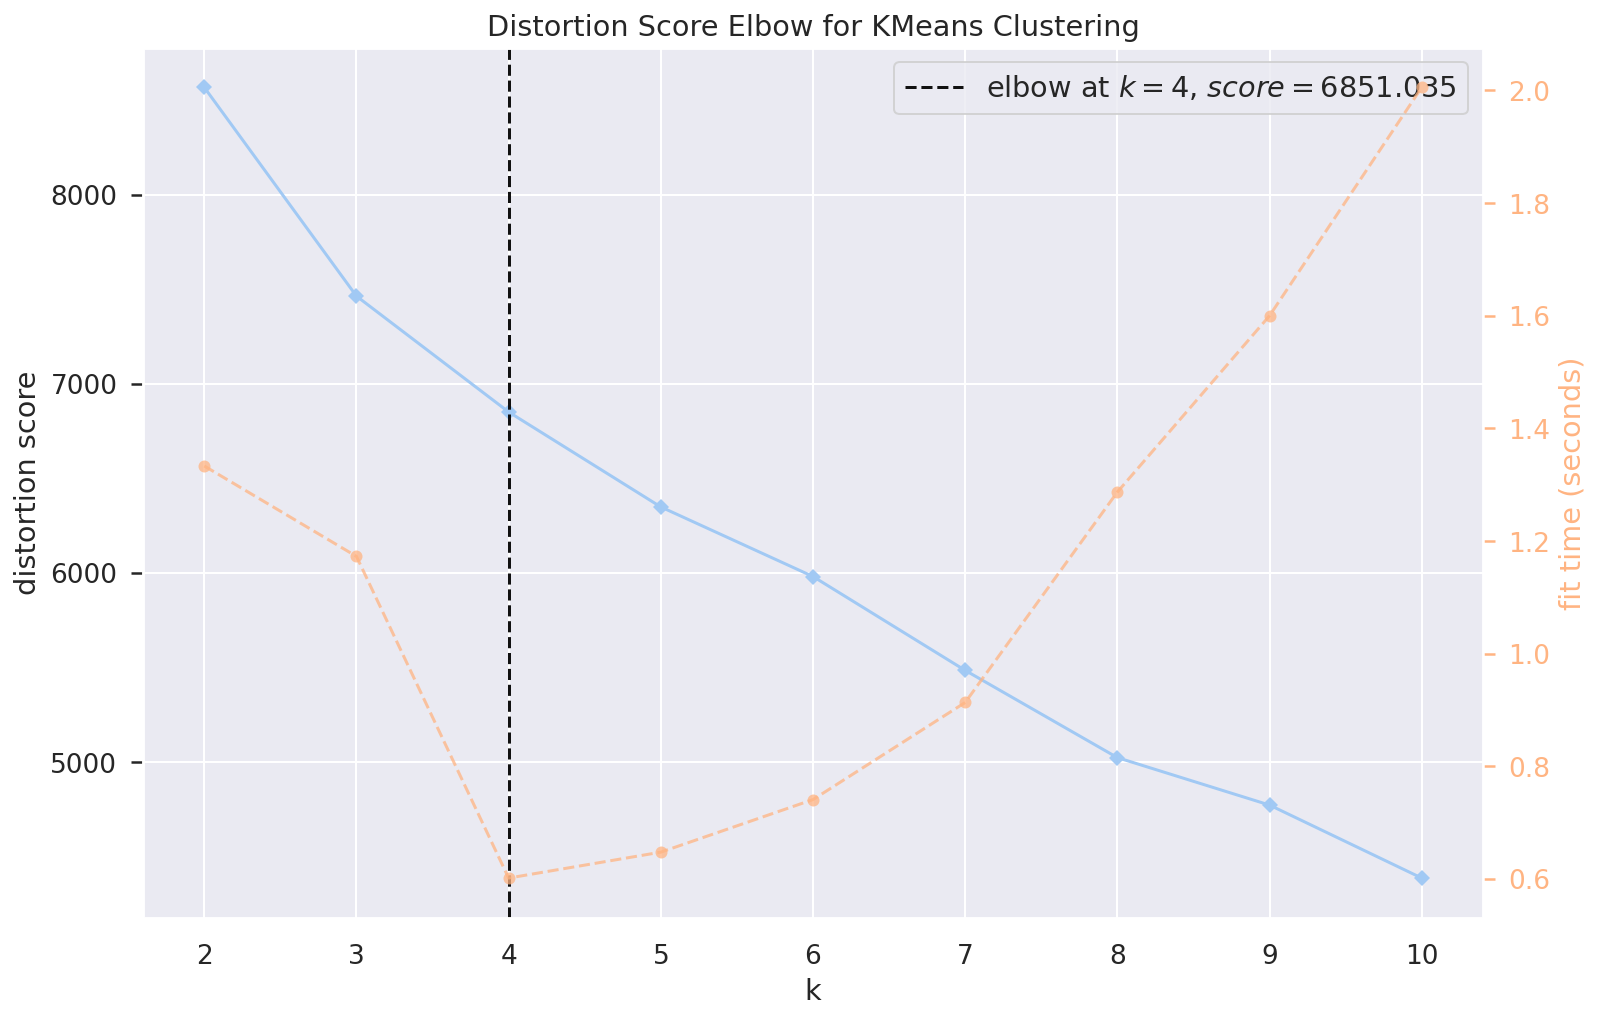

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(random_state=RANDOM_SEED), k=10)
Elbow_M.fit(preprocessed_data)
Elbow_M.show()

In [ ]:
num_c = 4
kmeans = KMeans(n_clusters=num_c, random_state=RANDOM_SEED)
kmeans.fit(preprocessed_data)
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
PCA_df["Clusters"] = kmeans.labels_
PCA_df

,col1,col2,col3,Clusters
0,1.074823,0.489525,-0.427166,2
1,-0.173385,-0.352251,0.708873,0
2,-0.827139,0.533607,0.098345,3
3,-0.498027,0.325981,-0.164250,1
4,0.654897,0.024129,-0.729517,2
...,...,...,...,...
5663,-0.680572,-0.695728,0.252665,1
5664,-1.007739,-0.013305,-0.364636,1
5665,0.823423,0.494137,-0.315907,2
5666,0.679944,0.671128,-0.296278,2


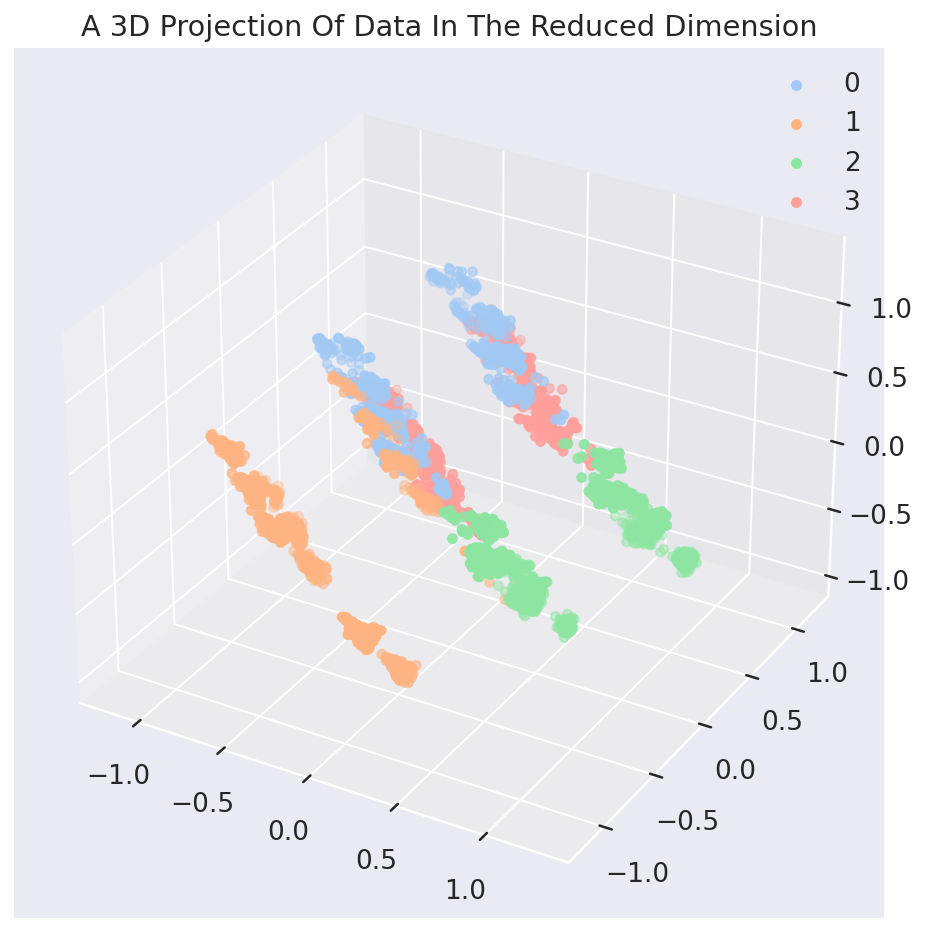

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

for i in np.unique(kmeans.labels_):
    x =PCA_df[PCA_df.Clusters == i]["col1"]
    y =PCA_df[PCA_df.Clusters == i]["col2"]
    z =PCA_df[PCA_df.Clusters == i]["col3"]
    ax.scatter(x, y, z, label = i)
    
ax.legend()
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# K-means Result Analyze

In [ ]:
no_null_data["Clusters"] = kmeans.labels_

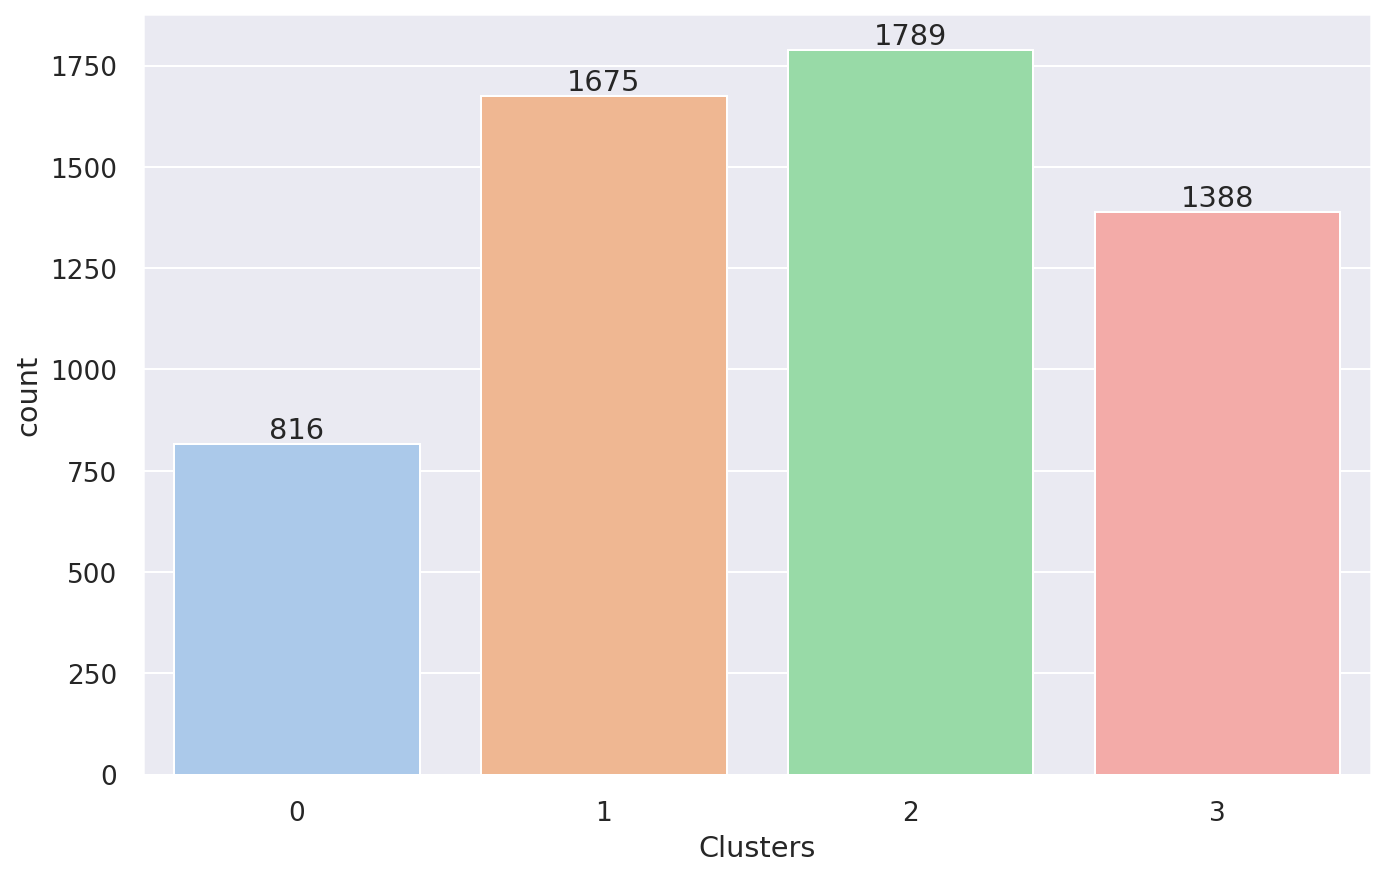

In [ ]:
plt.figure(figsize=(11, 7))
ax = sns.countplot(x='Clusters', data=no_null_data)
ax.bar_label(ax.containers[0])
plt.show()

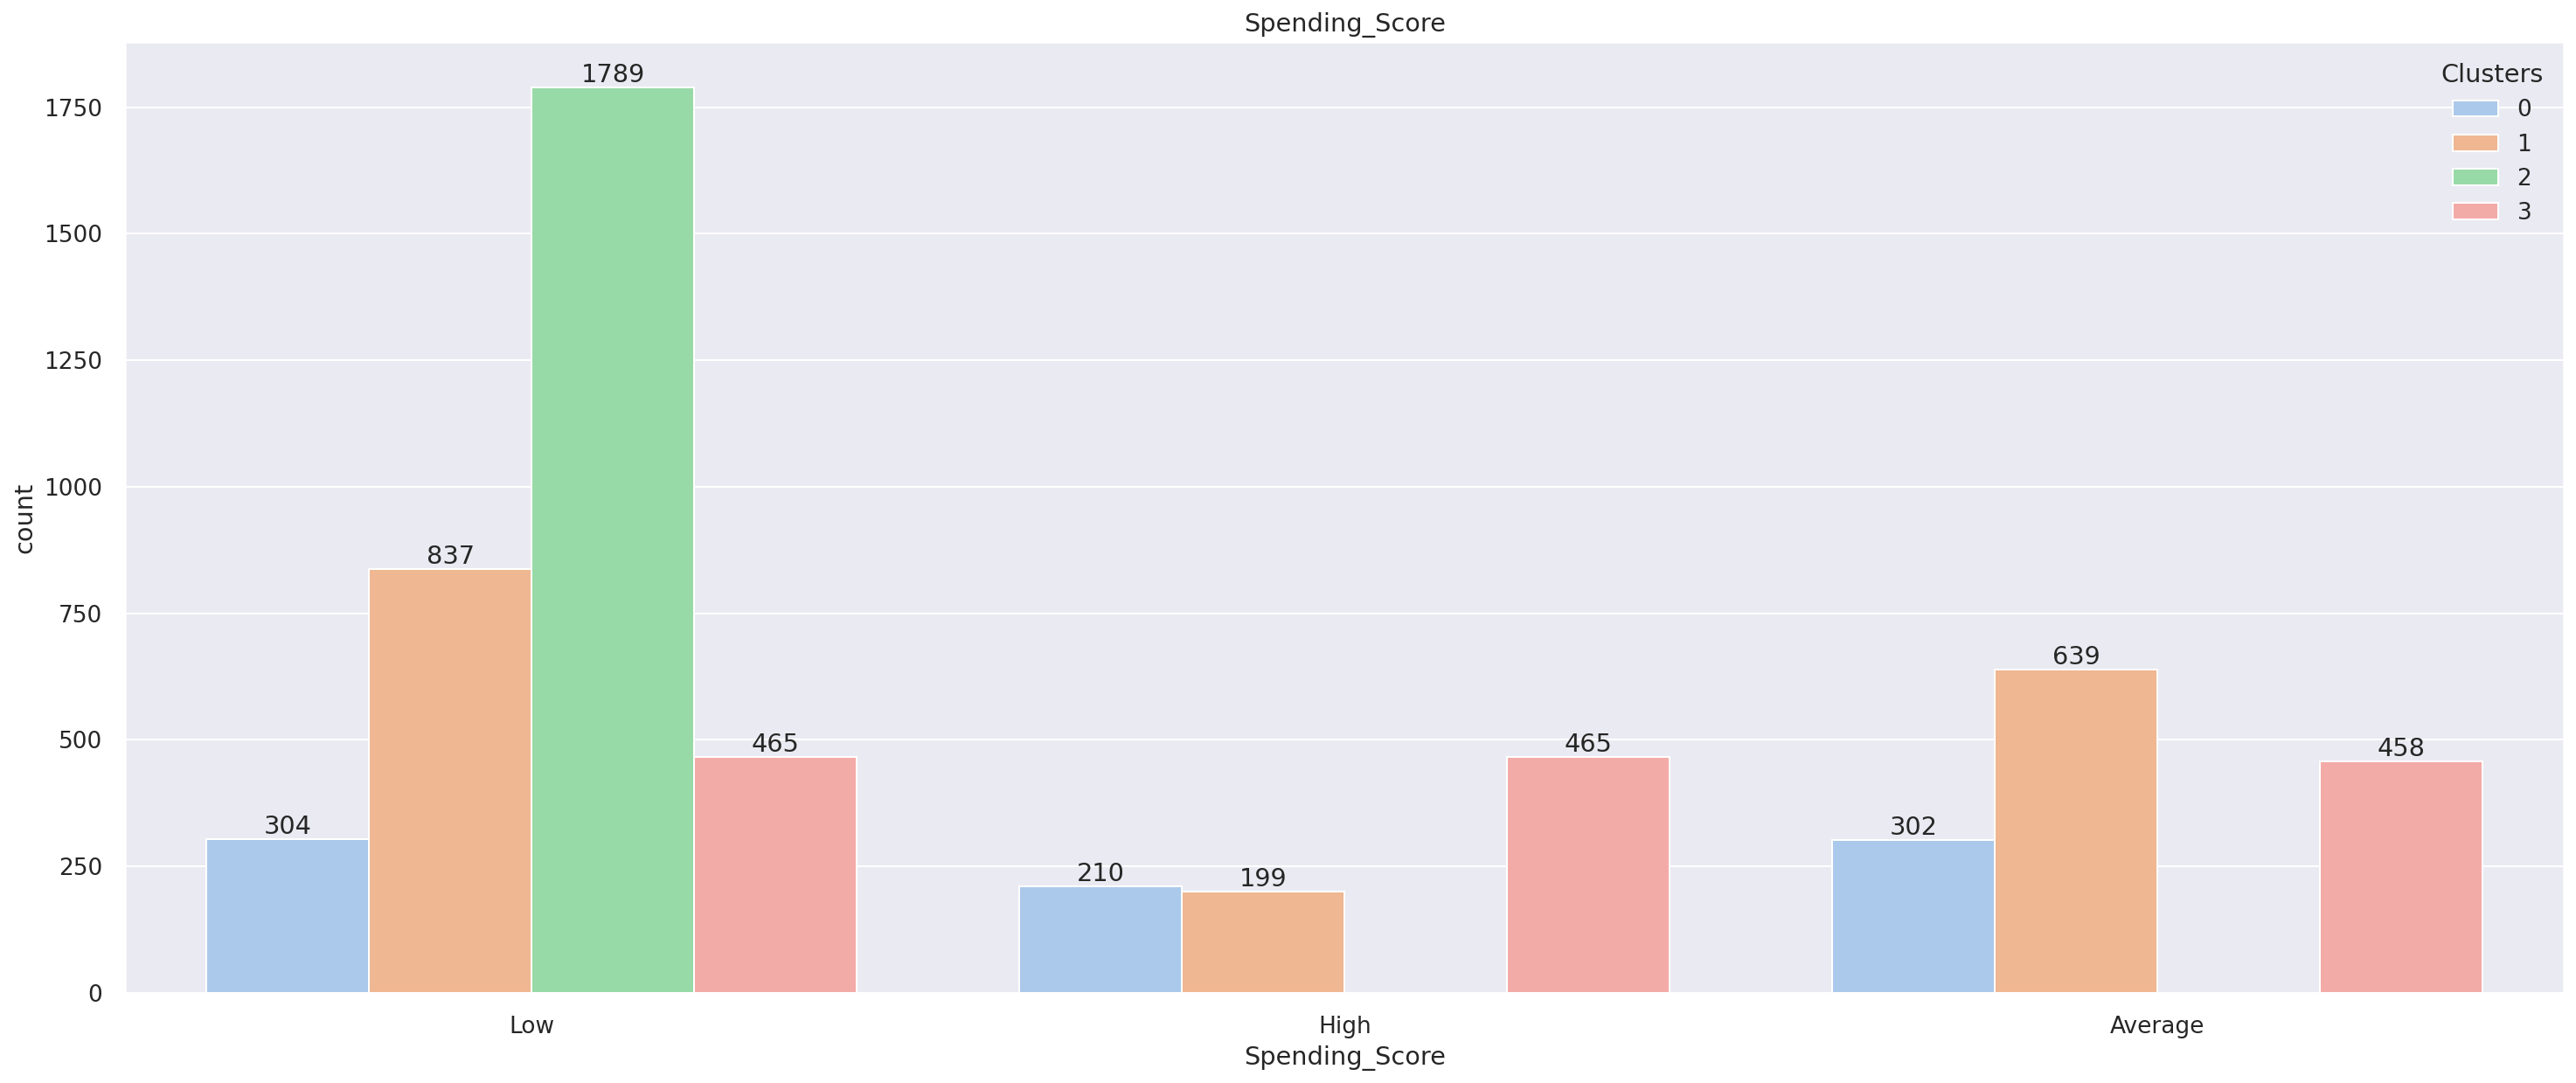

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Spending_Score')
ax = sns.countplot(x='Spending_Score', hue="Clusters", data=no_null_data)
for i in no_null_data.Clusters.unique():
    ax.bar_label(ax.containers[i])
plt.show()

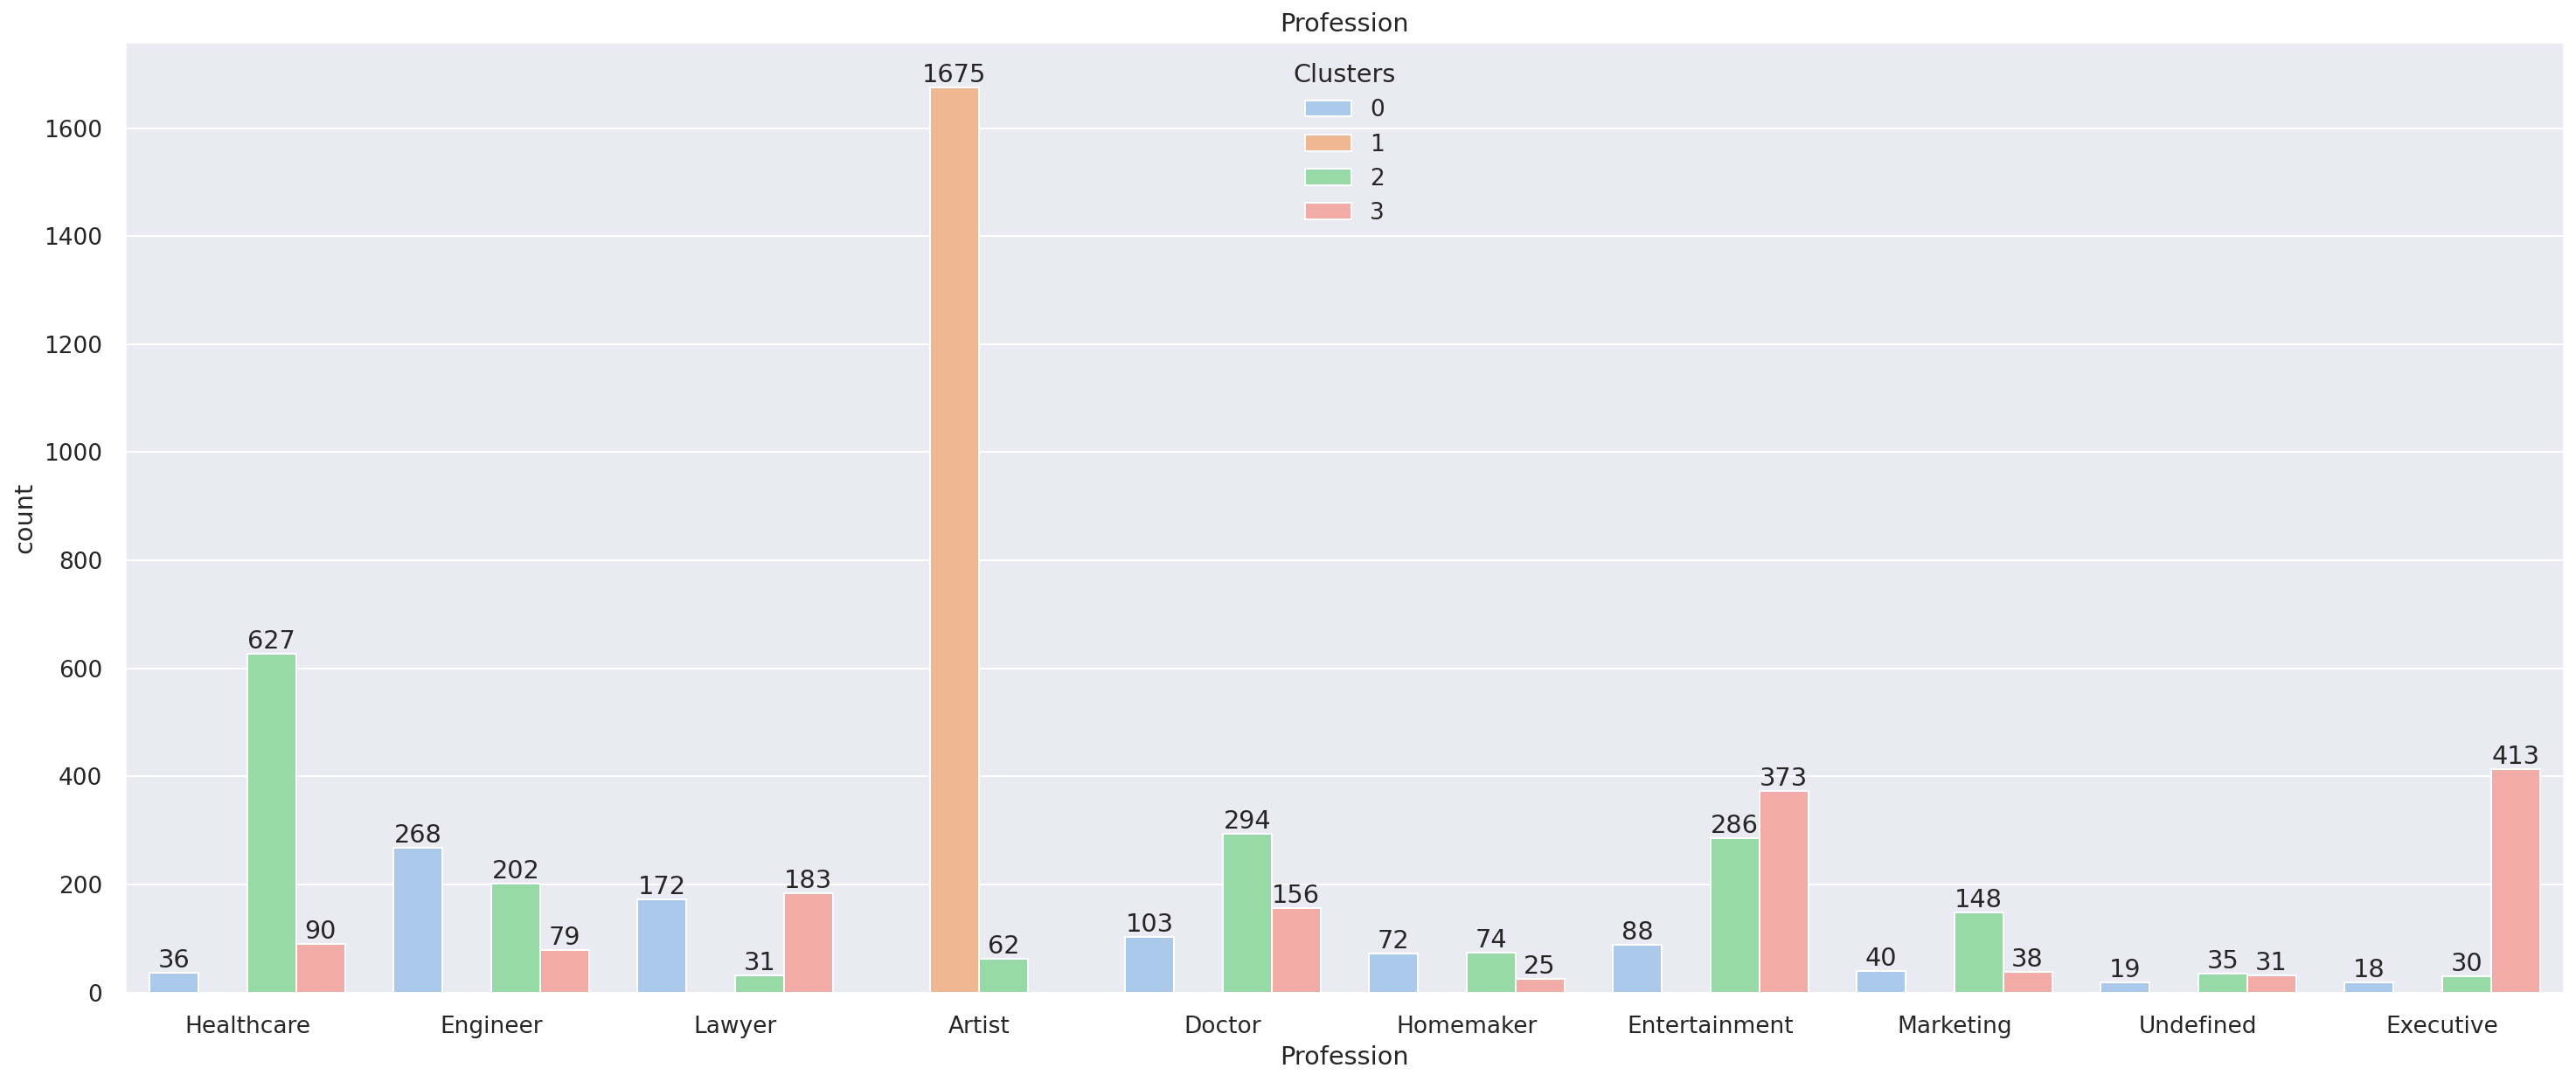

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Profession')
ax = sns.countplot(x='Profession', hue="Clusters", data=no_null_data)
for i in no_null_data.Clusters.unique():
    ax.bar_label(ax.containers[i])
plt.show()

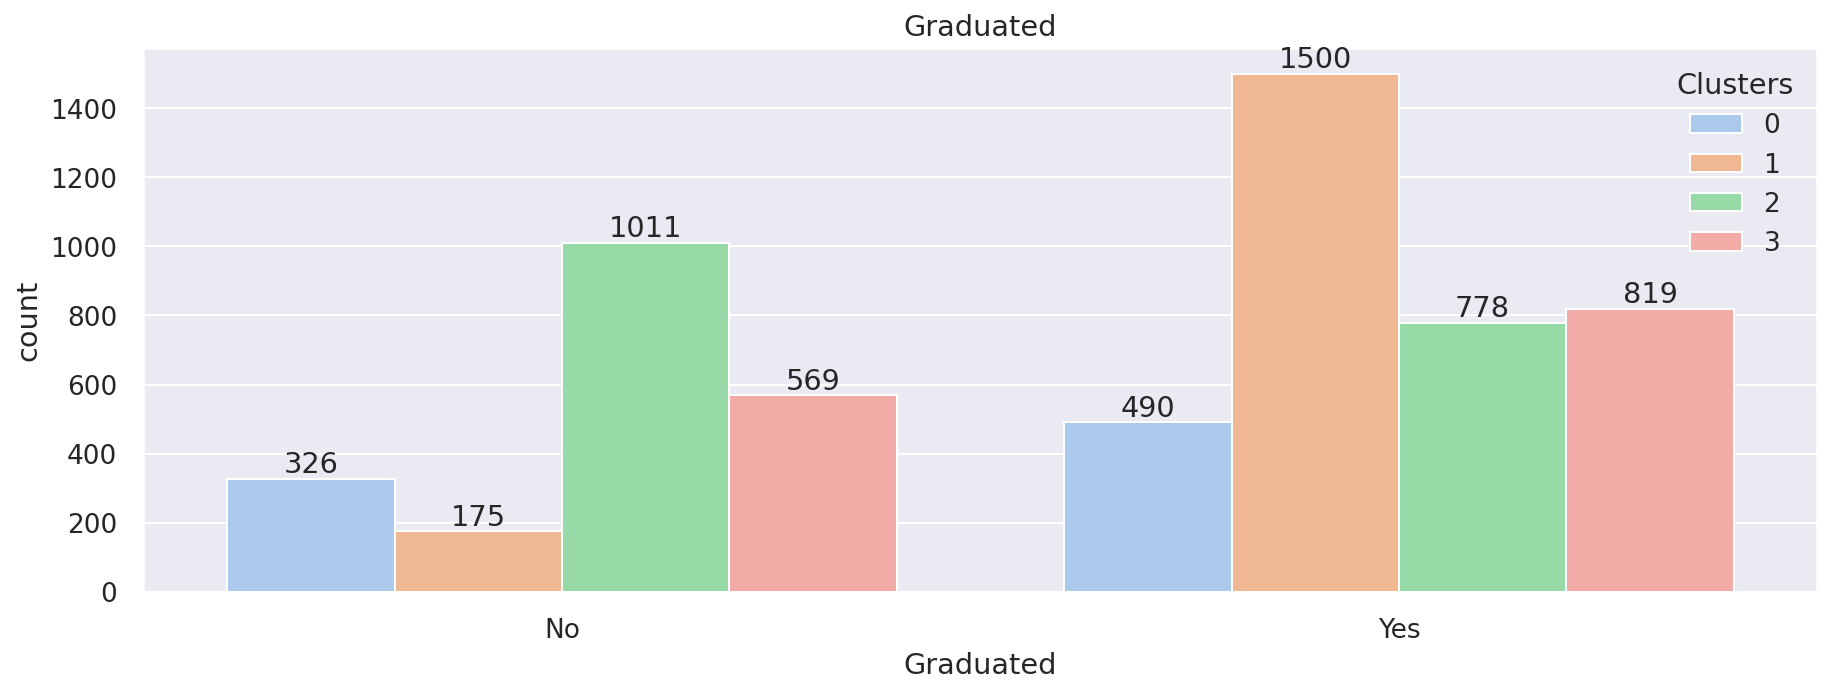

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Graduated')
ax = sns.countplot(x='Graduated', hue="Clusters", data=no_null_data)
for i in no_null_data.Clusters.unique():
    ax.bar_label(ax.containers[i])
plt.show()

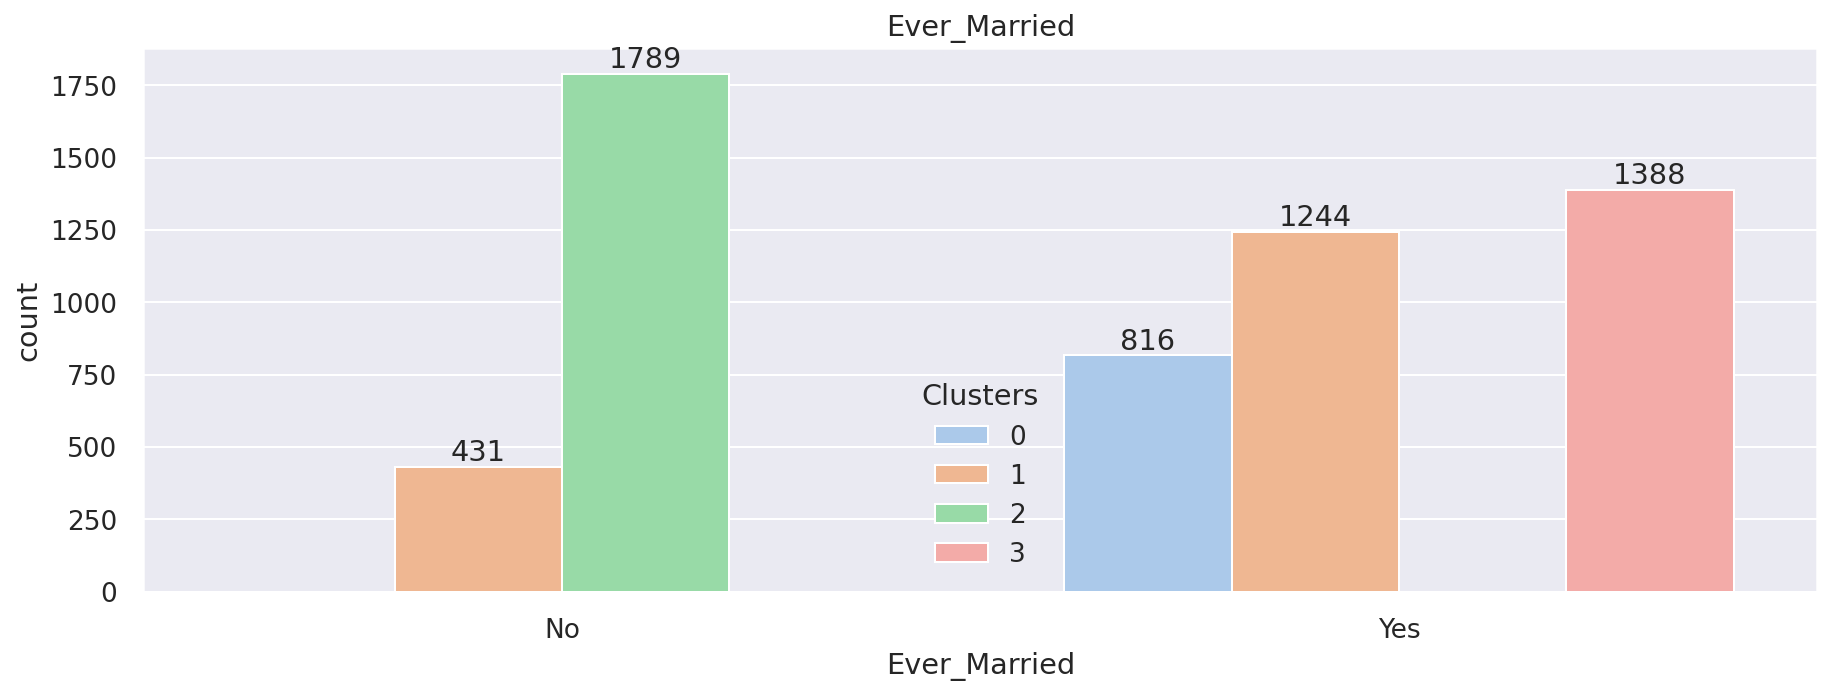

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Ever_Married')
ax = sns.countplot(x='Ever_Married', hue="Clusters", data=no_null_data)
for i in no_null_data.Clusters.unique():
    ax.bar_label(ax.containers[i])
plt.show()

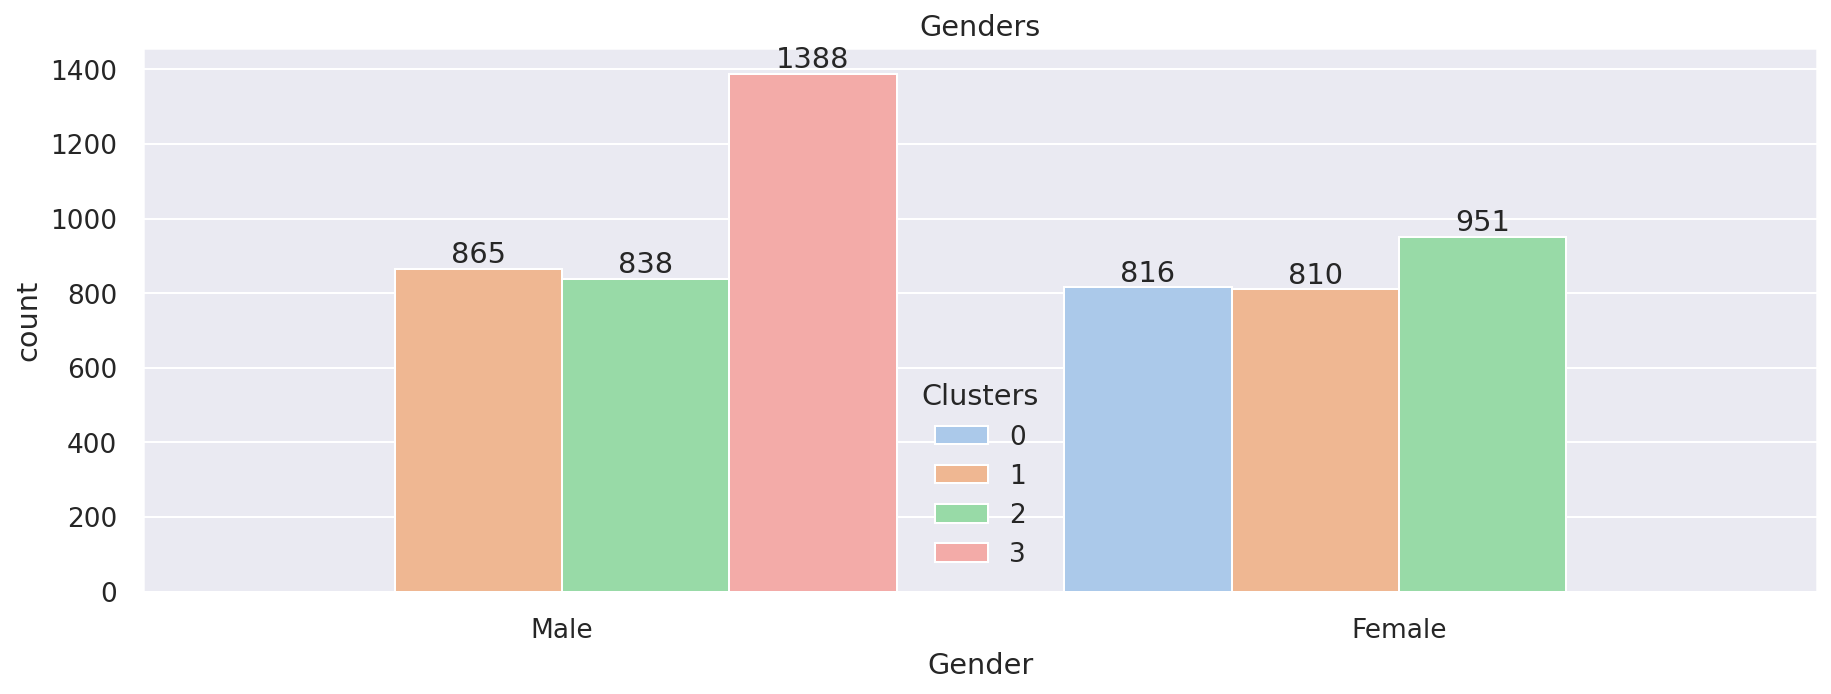

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Genders')
ax = sns.countplot(x='Gender', hue="Clusters", data=no_null_data)
for i in no_null_data.Clusters.unique():
    ax.bar_label(ax.containers[i])
plt.show()

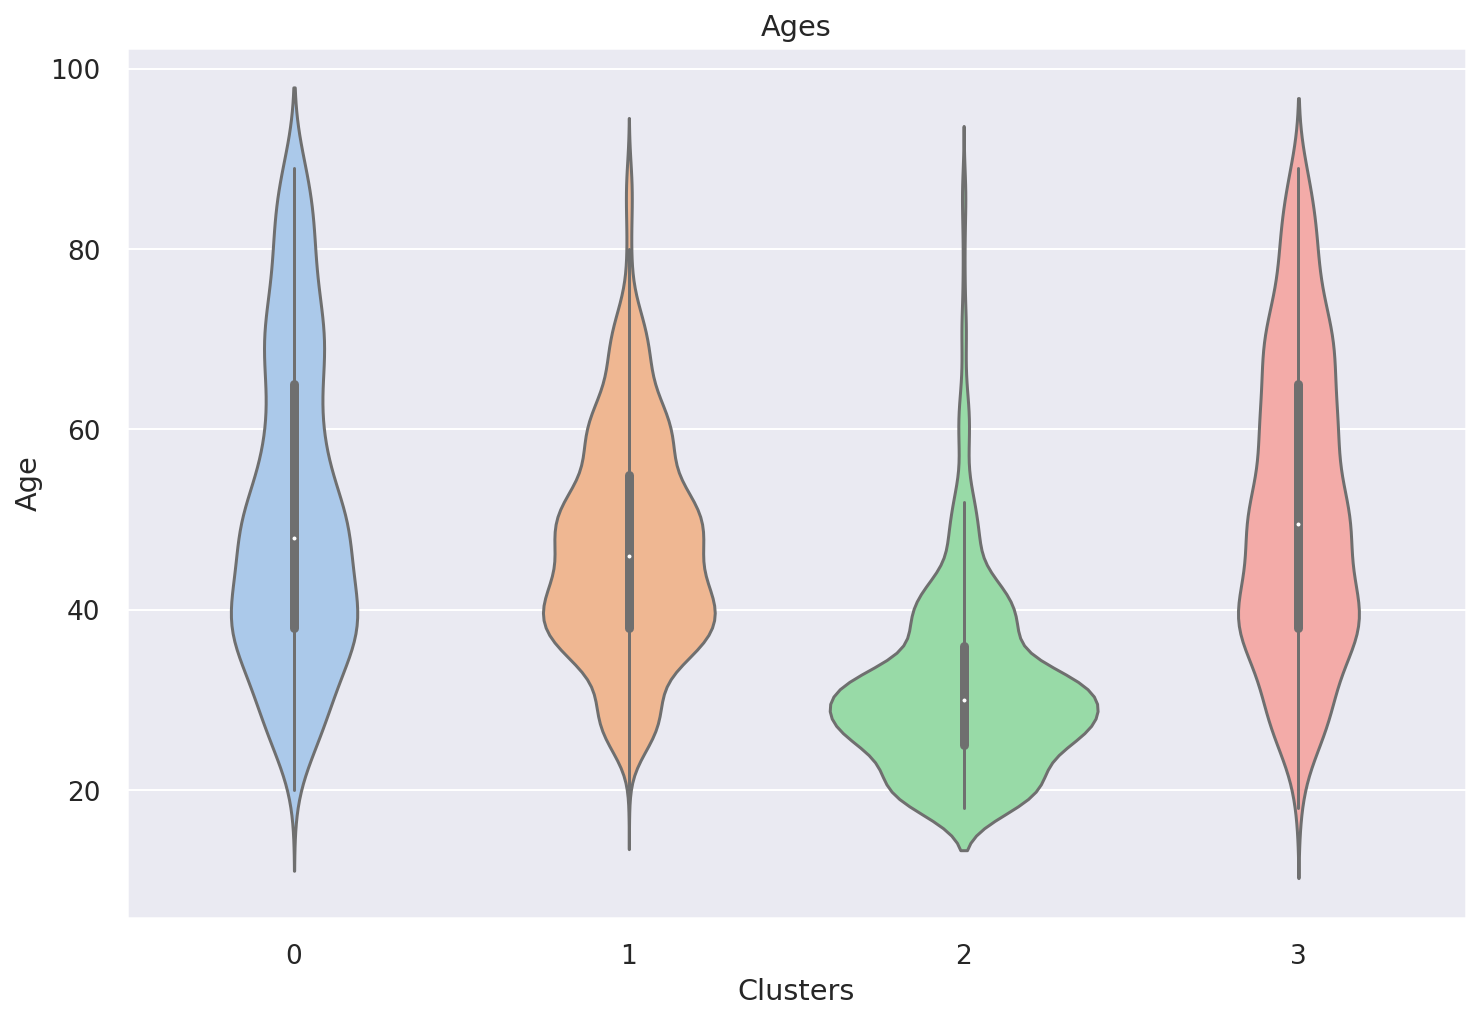

In [ ]:
sns.violinplot(x=no_null_data["Clusters"], y=no_null_data.Age)
plt.title('Ages')
plt.show()

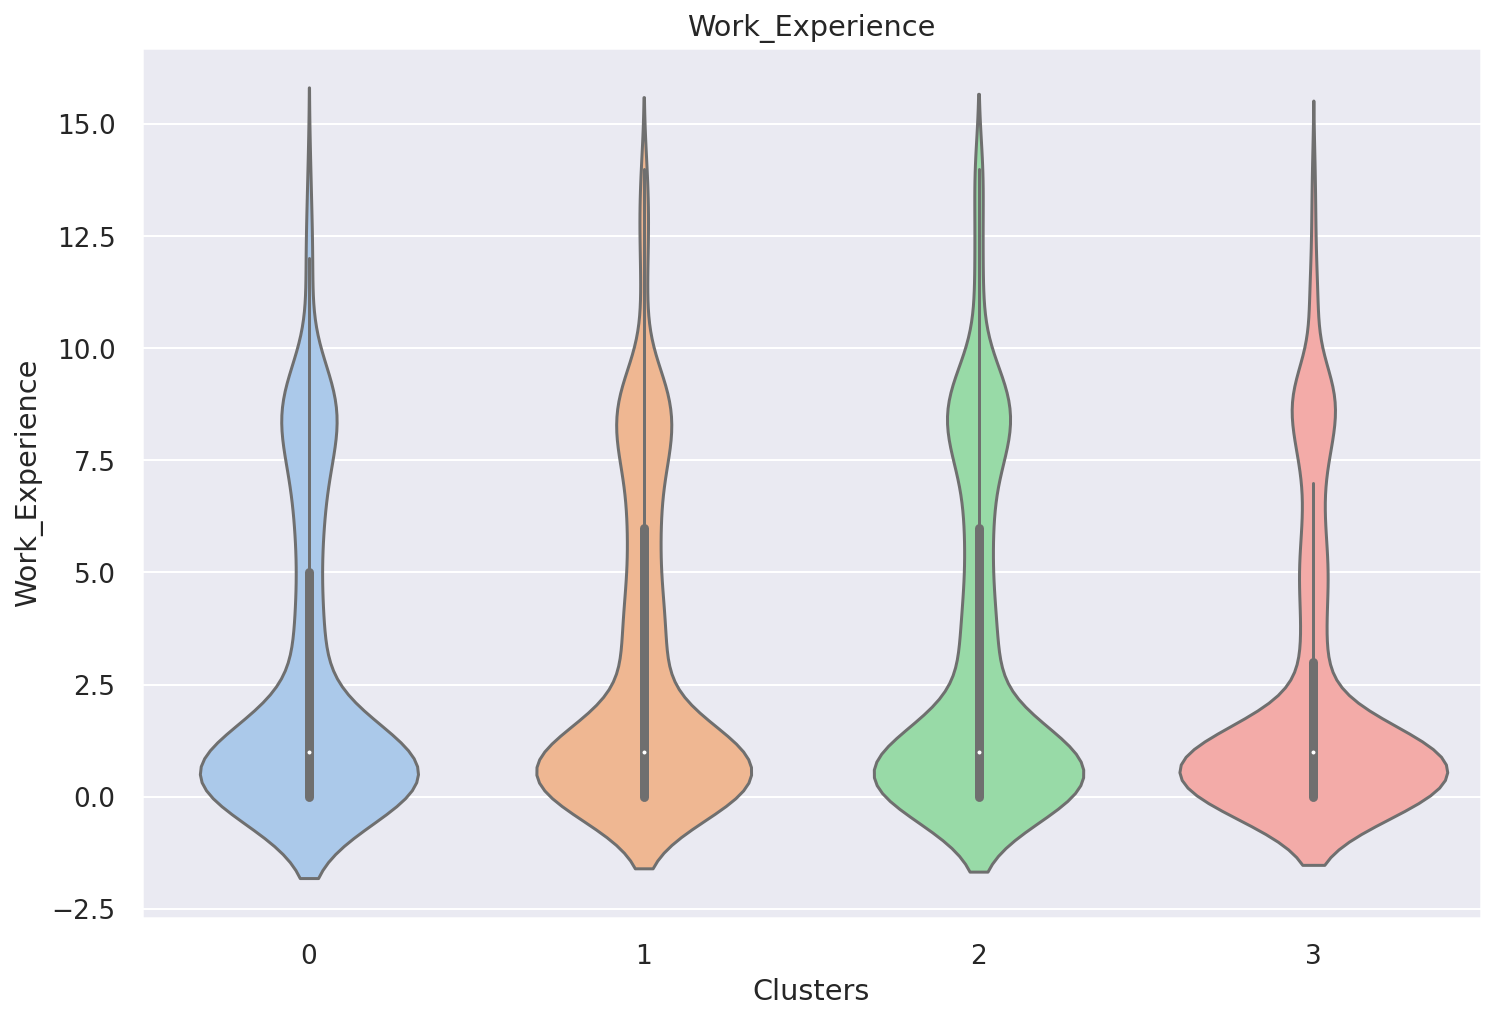

In [ ]:
sns.violinplot(x=no_null_data["Clusters"], y=no_null_data.Work_Experience)
plt.title('Work_Experience')
plt.show()

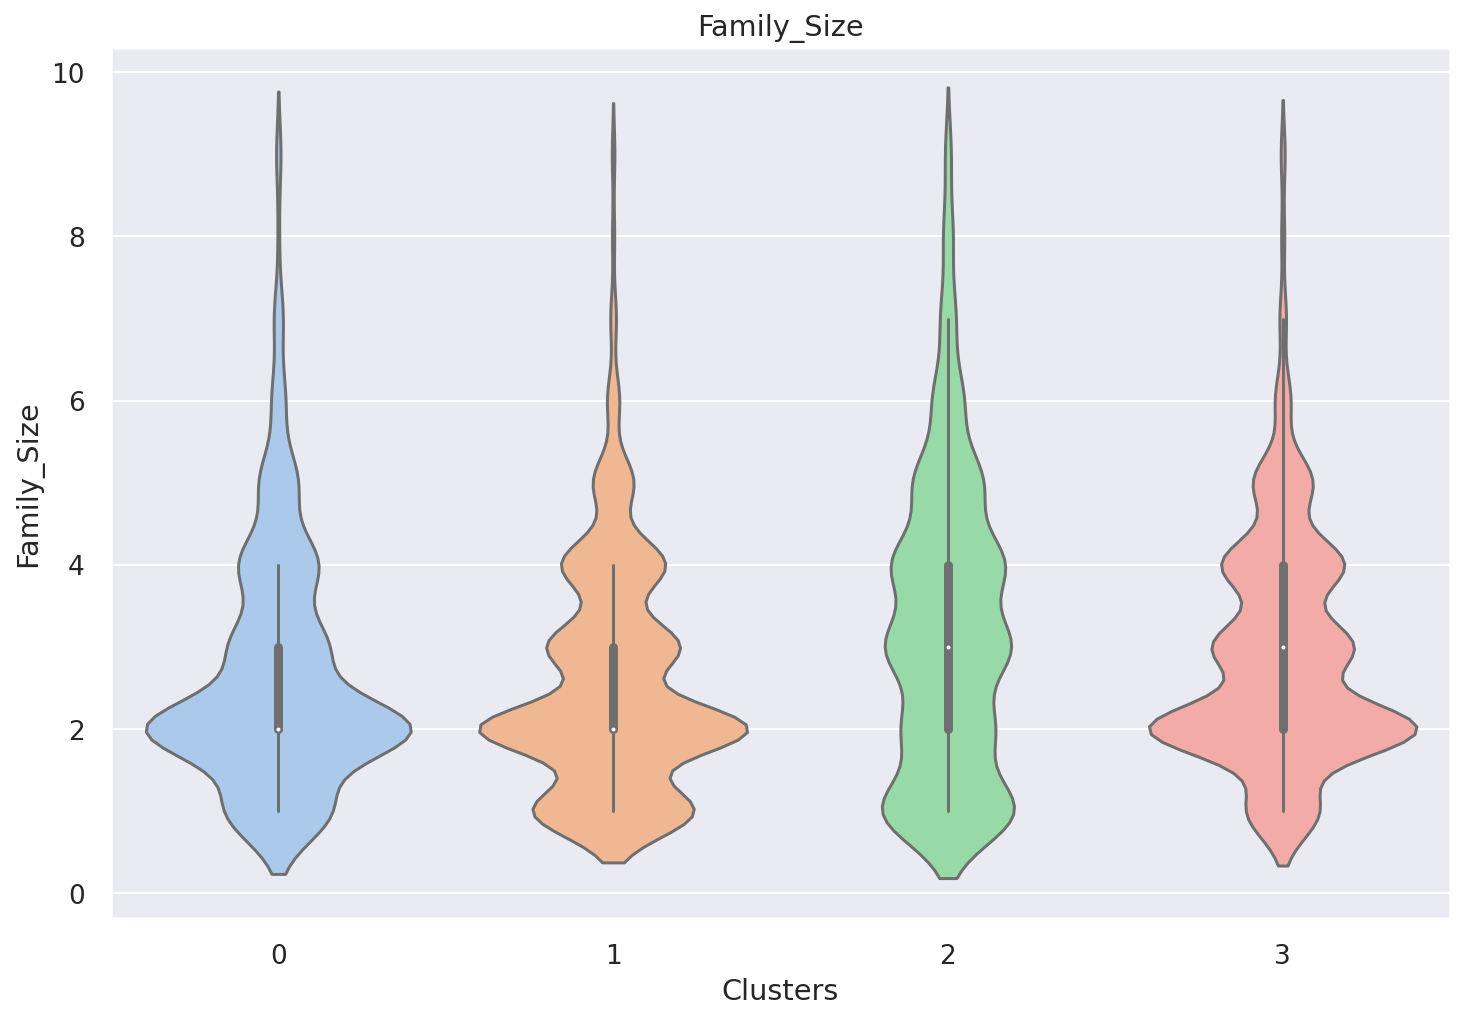

In [ ]:
sns.violinplot(x=no_null_data["Clusters"], y=no_null_data.Family_Size)
plt.title('Family_Size')
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
no_null_data.groupby('Clusters').describe()

Age                                                      \
           count       mean        std   min   25%   50%   75%   max   
Clusters                                                               
0          816.0  51.140931  17.087031  20.0  38.0  48.0  65.0  89.0   
1         1675.0  46.912836  12.238111  19.0  38.0  46.0  55.0  89.0   
2         1789.0  31.515372  10.420650  18.0  25.0  30.0  36.0  89.0   
3         1388.0  51.463977  16.475610  18.0  38.0  49.5  65.0  89.0   

         Work_Experience                                                \
                   count      mean       std  min  25%  50%  75%   max   
Clusters                                                                 
0                  816.0  2.796569  3.467329  0.0  0.0  1.0  5.0  14.0   
1                 1675.0  3.041194  3.524293  0.0  0.0  1.0  6.0  14.0   
2                 1789.0  3.212968  3.735663  0.0  0.0  1.0  6.0  14.0   
3                 1388.0  2.371037  3.230389  0.0  0.0  1.0  3.0  14.0   

         Family_Size                                               
               count      mean       std  min  25%  50%  75%  max  
Clusters                                                           
0              816.0  2.659314  1.462534  1.0  2.0  2.0  3.0  9.0  
1             1675.0  2.561791  1.379218  1.0  2.0  2.0  3.0  9.0  
2             1789.0  3.214645  1.824145  1.0  2.0  3.0  4.0  9.0  
3             1388.0  2.912824  1.408710  1.0  2.0  3.0  4.0  9.0

## Customer Segmentation

C0:
- The smallest customer group
- Having average purchasing power
- Mostly engineer and lawyer with graduated education level
- All of them are married female
- Middle to high age customer group (38-65)
- Small family size (might not have kid)
- Medium work experience

C1:
- Medium to low purchasing power
- All of them are artist
- Most of them have a graduated education level and married
- Contains both male and female in equal portion
- Have wide range of work experience mostly are 3+
- Age are around 38-55 with family size of 2-3

C2:
- The largest portion of customer group
- Also the lowest purchasing power customer group
- Work in healthcare, doctor, entertainment, marketing fields
- More than half not having graduated educaiton level
- Young age customer group (25-36) but with highest average work experience
- Definitely not a parent and has no kid or teen
- Family size of 2-4 people usually 3 people
- Might live with their parents (mom and dad)
- Not married yet

C3:
- Married male with graduated education level
- Mostly work as executive 
- Also work in entertainment, doctor, lawyer fields too
- Middle to high age customer group (38-65)
- Family size 2-4 people
- Might have kid that still around kid or teen stage
- Having low work experience but got the highest purchasing power

# 2. Product Recommendation

##Jitta Wealth Product
- Jitta Ranking
- Global ETF
- Thematic

###C0: Jitta Ranking

We should recommend **Jitta Ranking** to C0 due to their purchasing power and not having kid so they must have a lot of saving that can be use in investment with aggressive style because they don't have kid so they have low burden.

###C1: Global ETF

Middle age married artist with graduation education level. They don't have a family burden so **Global ETF** must be suitable for this group. This group can not afford an expensive but can take risk to a certain degree and they sure are educated so they able to choose their style of Global ETF to suit their preference.

###C2: Thematic

Young age fresh graduate with no burden and live with parent. Nothing can hold them back when they want to risk some money on investing! **Thematic** is the one for them because they're young and free. They mostly follow news on Social Network and know what's going on earth so they might want to choose their success path on investment.

###C3: Jitta Ranking

Their age and burden are big factors to consider a product for them. I suggest **Jitta Ranking** as C0 might be a good choice because they are high purchasing power men with high age so their investment should likely to be a big one and they still have a job and high salary so they can accept high risk.

# 3. Customer Segmentation Experiment

We can do A/B testing by
- Group A receive personalized ads that contain product for user in each segmentation
- Group B receive ads that contain product that is not for that customer segmentation group

We can send ads through Jitta Wealth application and moniter CTR and CVR rate on this notification

# 4. Customer Segmentation Future Plan

- Create customer score for each product and send only the product with highest score
- Find loyal customer from group of customer and study their behavior 
- Get more data and more feature for better segmentation result